PROJEKT - Analiza danych

Wybrany został zbiór danych dotyczący ofert sprzedaży mieszkań z serwisu OTODOM z czerwca 2024, na podstawie którego przeprowadzona zostanie analiza eksploracyjna danych.  

Plik analizowany nazywa się  apartments_pl_2024_06.csv, który pochodzi z serwisu Kaggle. Autorem jest Pan Krzysztof Jamroz. https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland  

Projekt dotyczy analizy danych ofert sprzedaży mieszkań z  15 największych miast w Polsce. Są to:  Białystok
Bydgoszcz
Częstochowa
Gdańsk
Gdynia
Katowice
Kraków
Lublin
Łódź
Poznań
Radom
Rzeszów
Szczecin
Warszawa
Wrocław

Podział zadań:
Czyszczenie, przekształcanie danych i statystyki opisowe - Mikołaj, Maja - osoba sprawdzająca
Eksploracyjna analiza danych i wizuaizacje - Michał, Mikołaj - osoba sprawdzająca
Wnioskowanie statystyczne - Maja, Michał - osoba sprawdzająca


In [2]:
#Importowanie bibliotek

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


Wyjaśnienia zmiennych 

- **city** — Nazwa miasta, w którym znajduje się nieruchomość.
- **type** — Typ budynku (np. blockOfFlats – blok, apartmentBuilding – kamienica/budynek wielorodzinny).
- **squareMeters** — Powierzchnia mieszkania w metrach kwadratowych (m²).
- **rooms** — Liczba pokoi w mieszkaniu.
- **floor** — Piętro, na którym zlokalizowane jest mieszkanie.
- **floorCount** — Całkowita liczba pięter w budynku.
- **buildYear** — Rok budowy budynku.
- **latitude, longitude** — Współrzędne geograficzne nieruchomości.
- **centreDistance** — Odległość od centrum miasta (w km).
- **poiCount** — Liczba punktów użyteczności publicznej (POI) w promieniu 500 m od mieszkania.
- **[poiName]Distance** — Odległość do najbliższego punktu użyteczności publicznej danego typu (np. schoolDistance, pharmacyDistance).
- **ownership** — Rodzaj własności (np. condominium – własność, cooperative – spółdzielcze).
- **condition** — Stan/standard wykończenia mieszkania (np. premium, high, low).
- **has[features]** — Zmienne logiczne (tak/nie) opisujące udogodnienia:
-  **hasParkingSpace**, **hasBalcony**, **hasElevator**, **hasSecurity**, **hasStorageRoom**.
- **price** — Cena oferty w Polskich Złotych (PLN).


In [3]:
# pobranie danych z pliku CSV i wyświetlenie pierwszych kilku wierszy
import pandas as pd
df = pd.read_csv("apartments_pl_2024_06.csv", encoding="utf-8")
print(df.head())

                                 id      city               type  \
0  811891f98a870dfd6e414374a0a85560  szczecin       blockOfFlats   
1  adaf636d0c44d8d9325bce42403eefee  szczecin  apartmentBuilding   
2  9b957bd60885a469c96f17b58a914f4b  szczecin  apartmentBuilding   
3  74fef2ff7135bc70797a3fbfd7d44ed6  szczecin       blockOfFlats   
4  77cc78c75b0d09bf84d6d3124a28803c  szczecin       blockOfFlats   

   squareMeters  rooms  floor  floorCount  buildYear   latitude  longitude  \
0         47.00    2.0    6.0        12.0     1981.0  53.428544  14.552812   
1         88.22    3.0    1.0         2.0     2000.0  53.449093  14.516844   
2        117.00    5.0    4.0         4.0        NaN  53.443096  14.561348   
3         33.31    1.0    1.0         4.0     1963.0  53.436100  14.541200   
4         56.00    3.0    7.0         7.0     2018.0  53.447465  14.557811   

   ...  pharmacyDistance    ownership  buildingMaterial  condition  \
0  ...             0.085  condominium      concreteS

In [4]:
# Wyświetlanie podstawowych informacji o zbiorze danych
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (21501, 28)

First few rows:
                                 id      city               type  \
0  811891f98a870dfd6e414374a0a85560  szczecin       blockOfFlats   
1  adaf636d0c44d8d9325bce42403eefee  szczecin  apartmentBuilding   
2  9b957bd60885a469c96f17b58a914f4b  szczecin  apartmentBuilding   
3  74fef2ff7135bc70797a3fbfd7d44ed6  szczecin       blockOfFlats   
4  77cc78c75b0d09bf84d6d3124a28803c  szczecin       blockOfFlats   

   squareMeters  rooms  floor  floorCount  buildYear   latitude  longitude  \
0         47.00    2.0    6.0        12.0     1981.0  53.428544  14.552812   
1         88.22    3.0    1.0         2.0     2000.0  53.449093  14.516844   
2        117.00    5.0    4.0         4.0        NaN  53.443096  14.561348   
3         33.31    1.0    1.0         4.0     1963.0  53.436100  14.541200   
4         56.00    3.0    7.0         7.0     2018.0  53.447465  14.557811   

   ...  pharmacyDistance    ownership  buildingMaterial  condition  \
0  ...  

In [5]:
print("\nData types:")
print(df.dtypes)


Data types:
id                       object
city                     object
type                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
buildingMaterial         object
condition                object
hasParkingSpace          object
hasBalcony               object
hasElevator              object
hasSecurity              object
hasStorageRoom           object
price                     int64
dtype: object


In [6]:
#Statystyka opisowa
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       squareMeters         rooms         floor    floorCount     buildYear  \
count  21501.000000  21501.000000  17928.000000  21292.000000  18121.000000   
mean      56.968572      2.622948      3.404786      5.474826   1986.774129   
std       20.617717      0.892924      2.606225      3.407545     32.796668   
min       25.000000      1.000000      1.000000      1.000000   1850.000000   
25%       42.690000      2.000000      2.000000      3.000000   1969.000000   
50%       52.810000      3.000000      3.000000      4.000000   1993.000000   
75%       66.300000      3.000000      4.000000      7.000000   2016.000000   
max      150.000000      6.000000     29.000000     29.000000   2024.000000   

           latitude     longitude  centreDistance      poiCount  \
count  21501.000000  21501.000000    21501.000000  21501.000000   
mean      51.992750     19.496174        4.431978     20.542951   
std        1.313801      1.754150        2.783001     23.905646   
m

Charakterystyka Nieruchomości
Analiza Powierzchni

Średnia powierzchnia (57 m²): Jest to metraż typowy dla polskich warunków, odpowiadający mieszkaniu trzypokojowemu (standard M4). Tradycyjnie taki układ dedykowany był rodzinie czteroosobowej (salon + dwie sypialnie). Współcześnie jednak, biorąc pod uwagę zmiany demograficzne i model pracy, trzeci pokój zyskuje nowe funkcje. Zamiast pokoju dziecięcego, może by adaptowany jest na domowe biuro (home office), gabinet do przyjmowania klientów lub pokój gościnny.

Wartość minimalna (25 m²): Dolna granica zbioru pokrywa się z aktualnymi przepisami polskiego prawa budowlanego (§ 94,Dz.U.2022.1225 ), które określają minimalną powierzchnię samodzielnego lokalu mieszkalnego właśnie na 25 m². Sugeruje to, że dane zostały poprawnie wyczyszczone z błędnych wpisów (np. garaży czy komórek).

Wartość maksymalna (150 m²): Górna granica wskazuje na obecność w zbiorze dużych apartamentów. Jednocześnie brak metraży rzędu powyżej m² pozwala na postawienie hipotezy, że zbiór zawiera wyłącznie mieszkania, a wyklucza domy jednorodzinne, które zazwyczaj charakteryzują się znacznie większą powierzchnią. 

Mediana liczby pokoji to 3 pokoje. Jest to tożsame z powierzchnią mieszkań.

Wiek budynku (buildYear): Zakres to 1850 – 2024. Przekrój od przedwojennych kamienic i bloki z PRL po rynek pierwotny i nowo oddane budynki. Mediana to 1993 a średnia wynosi 1986. Fakt, że średnia  jest niższa od mediany , wskazuje na rozkład lewostronnie skośny. Wynika to z obecności w zbiorze starych nieruchomości (np. XIX-wiecznych kamienic), które matematycznie zaniżają średnią. Mediana jest tu bardziej miarodajna i pokazuje, że „typowy” budynek pochodzi z 1993 roku, a połowa wszystkich ofert jest nowsza niż ten rok. Połowa mieszkań została wybudowana pozniej niż 1993 rok.

Mediana liczby pięter to 3 , co pasuje do polskiego krajobrazu, maksymalna liczba piętra to 29, co pokazuję, ze w zbiorze były oferty z najwyższych nowoczesnych wieżowcow.

Wszystki dane distance, obrazują, że mieszkania znajdują się w gęste zabudowie miejskiej.
Średnia odległość do szkoły, przedszkola, restauracji, apteki wynosi 300-400 metrów, rzadko kiedy wartosc dla trzeciego kwartyla przekracza pół kilometra.

Średnio mieszkania mają 20 punktów w okolicy, 
Najtańsze mieszkanie zostało wystawione za  191 000 zł. Najdroższe mieszkanie kosztowało 3 mln złoty.

Średnia (~823 tys. zł) jest wyższa niż Mediana (~721 tys. zł), to rozkład prawoskośny. Kilka bardzo drogich luksusowych apartamentów zawyża średnią, ale typowy obywatel kupuje mieszkanie za ok. 720 tys. zł.

In [7]:
# Obliczamy średnią cenę dla każdego miasta
avg_price_by_city = df.groupby('city')['price'].mean().round(2).reset_index(name='avg_price').sort_values('avg_price', ascending=False)
avg_price_by_city

,city,avg_price
13,warszawa,1053134.17
6,krakow,942168.78
3,gdansk,891338.46
4,gdynia,884684.61
14,wroclaw,745965.31
9,poznan,647102.18
11,rzeszow,636870.79
8,lublin,581738.83
12,szczecin,572548.94
5,katowice,528239.56


Najwyższą cena średnia posiada Warszawa, Kraków, Gdańsk i Gdynia. Średnia cena w tych miastach jest większą niż średnia z całej próbki.

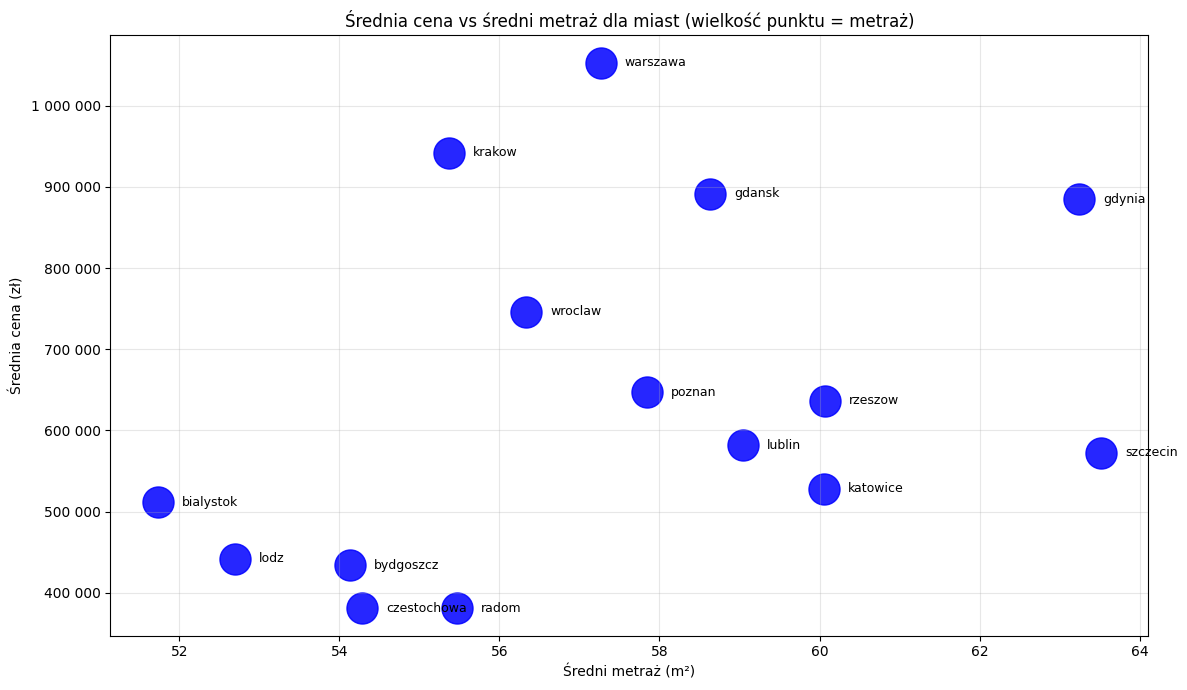

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# 1.
# Obliczamy średnią cenę i metraż dla każdego miasta
df_plot = df.groupby('city')[['price', 'squareMeters']].mean().reset_index()

df_plot.columns = ['city', 'avg_price', 'avg_squareMeters']

# 2. DEFINICJA OSI
x = df_plot['avg_squareMeters']
y = df_plot['avg_price']

sizes = 500  

# 3. RYSOWANIE WYKRESU
fig, ax = plt.subplots(figsize=(12, 7))

# Przykład dla koloru niebieskiego
sc = ax.scatter(x, y, s=sizes, c='blue', alpha=0.85)

# 4. PODPISY MIAST
for _, r in df_plot.iterrows():
    ax.text(r['avg_squareMeters'] + 0.3, r['avg_price'], r['city'], fontsize=9, va='center')

# 5. FORMATOWANIE
ax.set_xlabel('Średni metraż (m²)')
ax.set_ylabel('Średnia cena (zł)')
ax.set_title('Średnia cena vs średni metraż dla miast (wielkość punktu = metraż)')
ax.grid(alpha=0.3)

# Formatowanie osi Y 
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda val, pos: f"{int(val):,}".replace(',', ' ')))

plt.tight_layout()
plt.show()

W oparciu o powyższy wykres zależności średniej ceny do średniego metrażu w danym mieście , dokonano segmentacji badanych miast, wyodrębniając cztery główne klastry o zbliżonej charakterystyce rynkowej.
Na wykresie można wyodrębnić cztery wyraźne grupy miast o odmiennej charakterystyce:

      
1. Warszawa jest outlierem. Jest to rynek całkowicie oderwany od reszty kraju pod względem cenowym. Mimo że średni metraż  nie odbiega od średniej krajowej, cena całkowita jest wyższa niż w kolejnych najdroższych miastach.
2. Klaster 2: Rynki Premium.
    Miasta: Kraków, Gdańsk, Gdynia
   Charakterystyka:Ścisła czołówka Polski.
   Kraków ma wysoką cenę przy najmniejszym metrażu ze zbioru. Gdynia ma z kolei największą średni metraż z tej grupy i drugi największy z wszystkich podanych miast.
3. Wrocław, Poznań, Rzeszów, Szczecin, Lublin, Katowice.
Ceny zawierają się w przedziale 550 tys. – 750 tys. zł.Wyróżnia się tu podgrupa miast oferujących dużą przestrzeń (Szczecin, Katowice, Rzeszów).
4. Rynki Budżetowe Kolor: 
Miasta o najniższej barierze wejścia (ceny poniżej 550 tys. zł) i najmniejszym przeciętnim metrażu.

In [9]:
## Etap 2 - Analiza brakujących danych
# liczba brakujacych danych (całkowita)
n_miss = df.isna().sum().sum()
print("n_miss:", n_miss)  

# liczba kompletnych obserwacji (wierszy bez braków)
n_complete = df.dropna().shape[0]
print("n_complete:", n_complete)  # liczba kompletnych obserwacji

# proporcja braków (w skali całego dataframe)
prop_miss = n_miss / (df.shape[0] * df.shape[1])
print("prop_miss:", prop_miss)  # proporcja brakujacych danych

# dodatkowo: brakujące wartości na kolumnę (opcjonalne)
print("missing per column:\n", df.isna().sum())

# ponowne obliczenie i wyświetlenie wyników
print("n_complete (computed):", n_complete)  # liczba kompletnych obserwacji
print("prop_miss (computed):", prop_miss)    # proporcja

n_miss: 37990
n_complete: 2750
prop_miss: 0.0631033772515564
missing per column:
 id                          0
city                        0
type                     4397
squareMeters                0
rooms                       0
floor                    3573
floorCount                209
buildYear                3380
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             11
clinicDistance             63
postOfficeDistance         20
kindergartenDistance       19
restaurantDistance         31
collegeDistance           584
pharmacyDistance           30
ownership                   0
buildingMaterial         8792
condition               15921
hasParkingSpace             0
hasBalcony                  0
hasElevator               960
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64
n_complete (computed): 2750
prop_miss (computed): 0.0631033772515

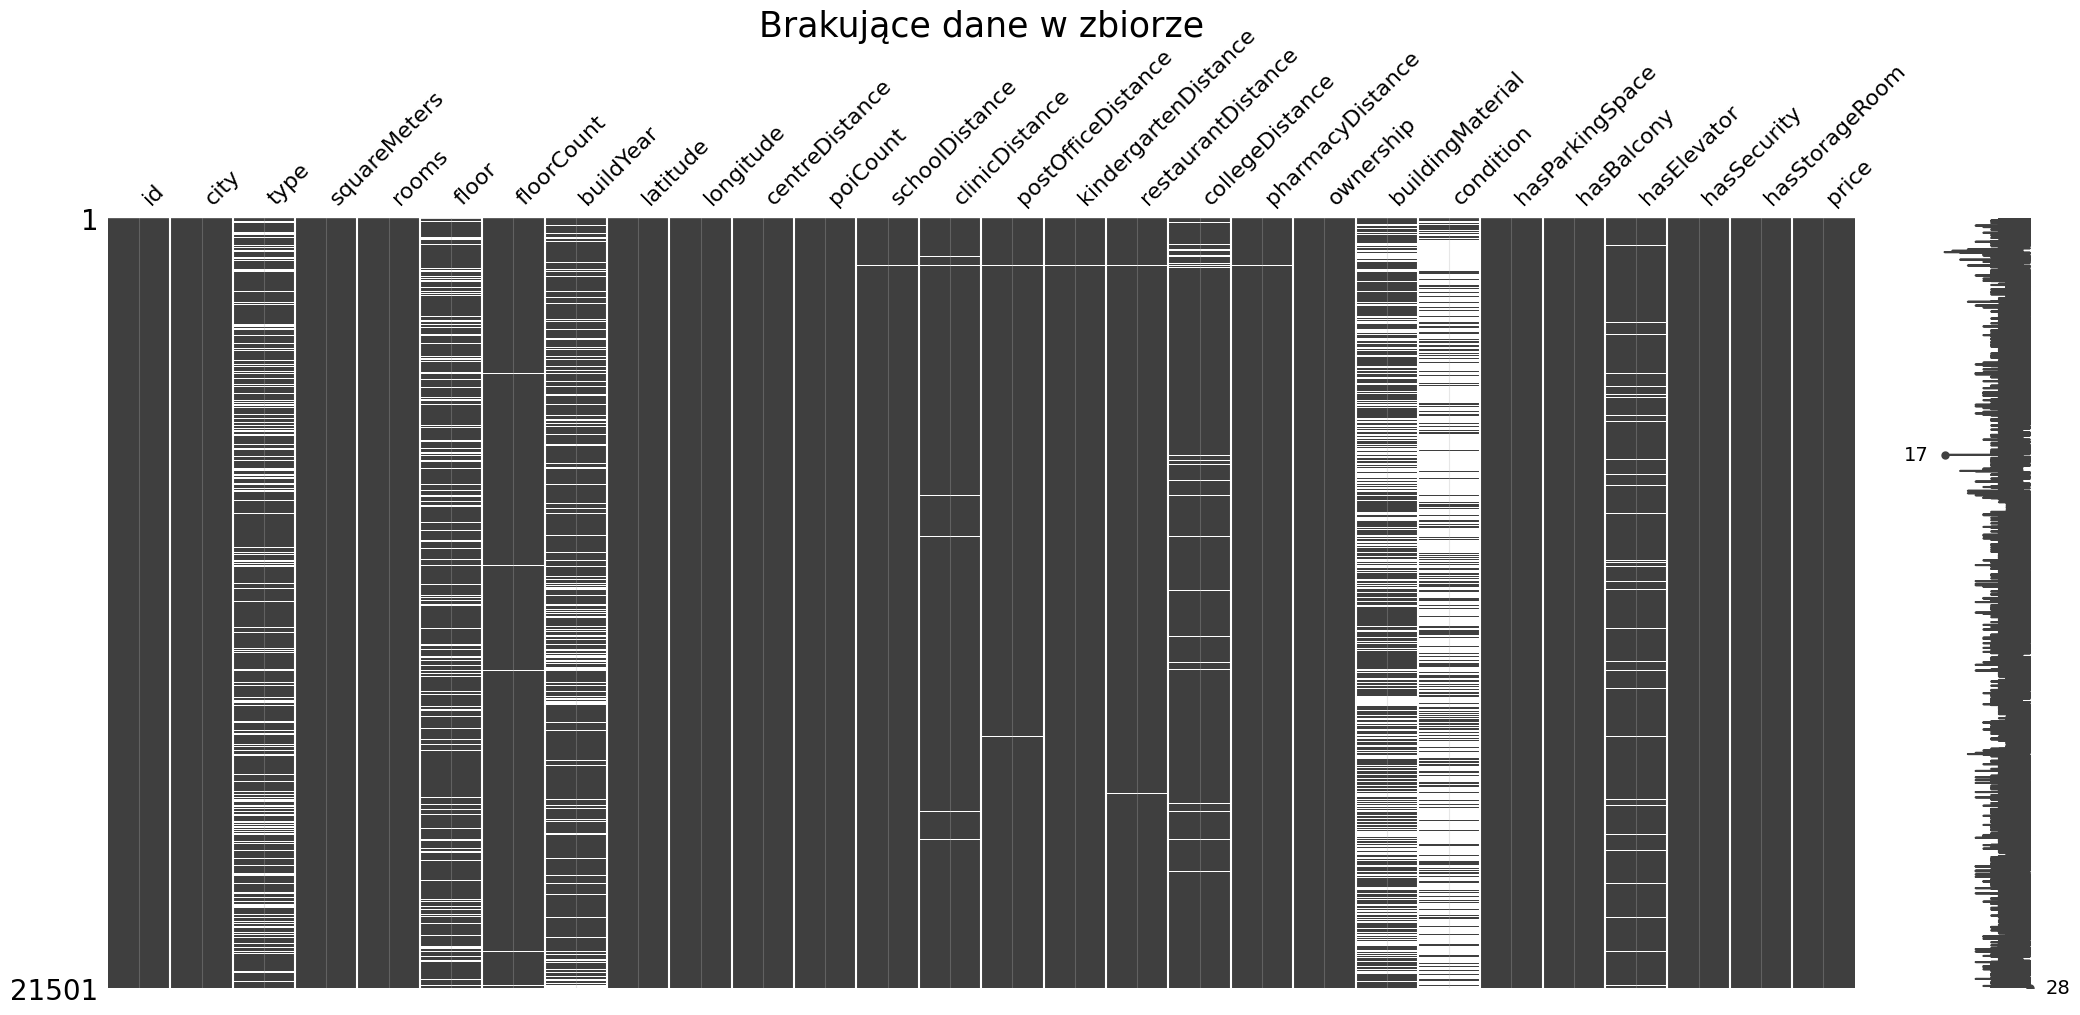

In [10]:
import missingno as msno
import matplotlib.pyplot as plt

ax = msno.matrix(df) 

ax.set_title('Brakujące dane w zbiorze', fontsize=25, y=1.225) 

ax.grid(alpha=0.3) 

plt.show()


In [11]:
# proporcja braków w poszczególnych kolumnach
prop_miss_cols = df.isna().sum() / df.shape[0]

print("Proporcje braków w kolumnach:")
print(prop_miss_cols)

# wizualizacja braków w kolumnach
prop_miss_cols_pct = df.isna().mean() * 100
print("Procent braków w kolumnach:")
print(prop_miss_cols_pct)


Proporcje braków w kolumnach:
id                      0.000000
city                    0.000000
type                    0.204502
squareMeters            0.000000
rooms                   0.000000
floor                   0.166178
floorCount              0.009720
buildYear               0.157202
latitude                0.000000
longitude               0.000000
centreDistance          0.000000
poiCount                0.000000
schoolDistance          0.000512
clinicDistance          0.002930
postOfficeDistance      0.000930
kindergartenDistance    0.000884
restaurantDistance      0.001442
collegeDistance         0.027162
pharmacyDistance        0.001395
ownership               0.000000
buildingMaterial        0.408911
condition               0.740477
hasParkingSpace         0.000000
hasBalcony              0.000000
hasElevator             0.044649
hasSecurity             0.000000
hasStorageRoom          0.000000
price                   0.000000
dtype: float64
Procent braków w kolumnach:
id 

Wykres przedstawia brakujące wartości w badanym zbiorze danych.
 Ciemne pola to dane kompletne, a białe brakujące.
 Zmienne niemal kompletne to: city, type, squareMeters, rooms, latitude, longitude, price.
 Są one istotnymi zmiennymi w kwestii zróżnicowania mieszkań i są całkowicie pozbawione braków.
 Przedstawia to jednolity ciemny wykres. Występują również zmienne z umiarkowanymi brakami. Sądzac z wykresu braki występują losowo i  raczej równomiernie w kolumnach: floorCount (0.9%),  zmiennych określajacych dystans ( które są też mniejsze niż 1%). 
 Zmienne : type, buildingMaterial i condition, mają duża częśc obserwacji brakujących. Jesto to odpowiednio 20%, 41%,74%. Będą one szczególnej uwagi przy czyszczeniu danych imputacja lub ich usunięcie.Podsumowując, większość kluczowych danych lokalizacja, metraż, cena jest kompletna, co czyni zbiór gotowym do dalszej analizy. Braki koncentrują się głównie na zmiennych opisujących wyposażenie i stan budynku.

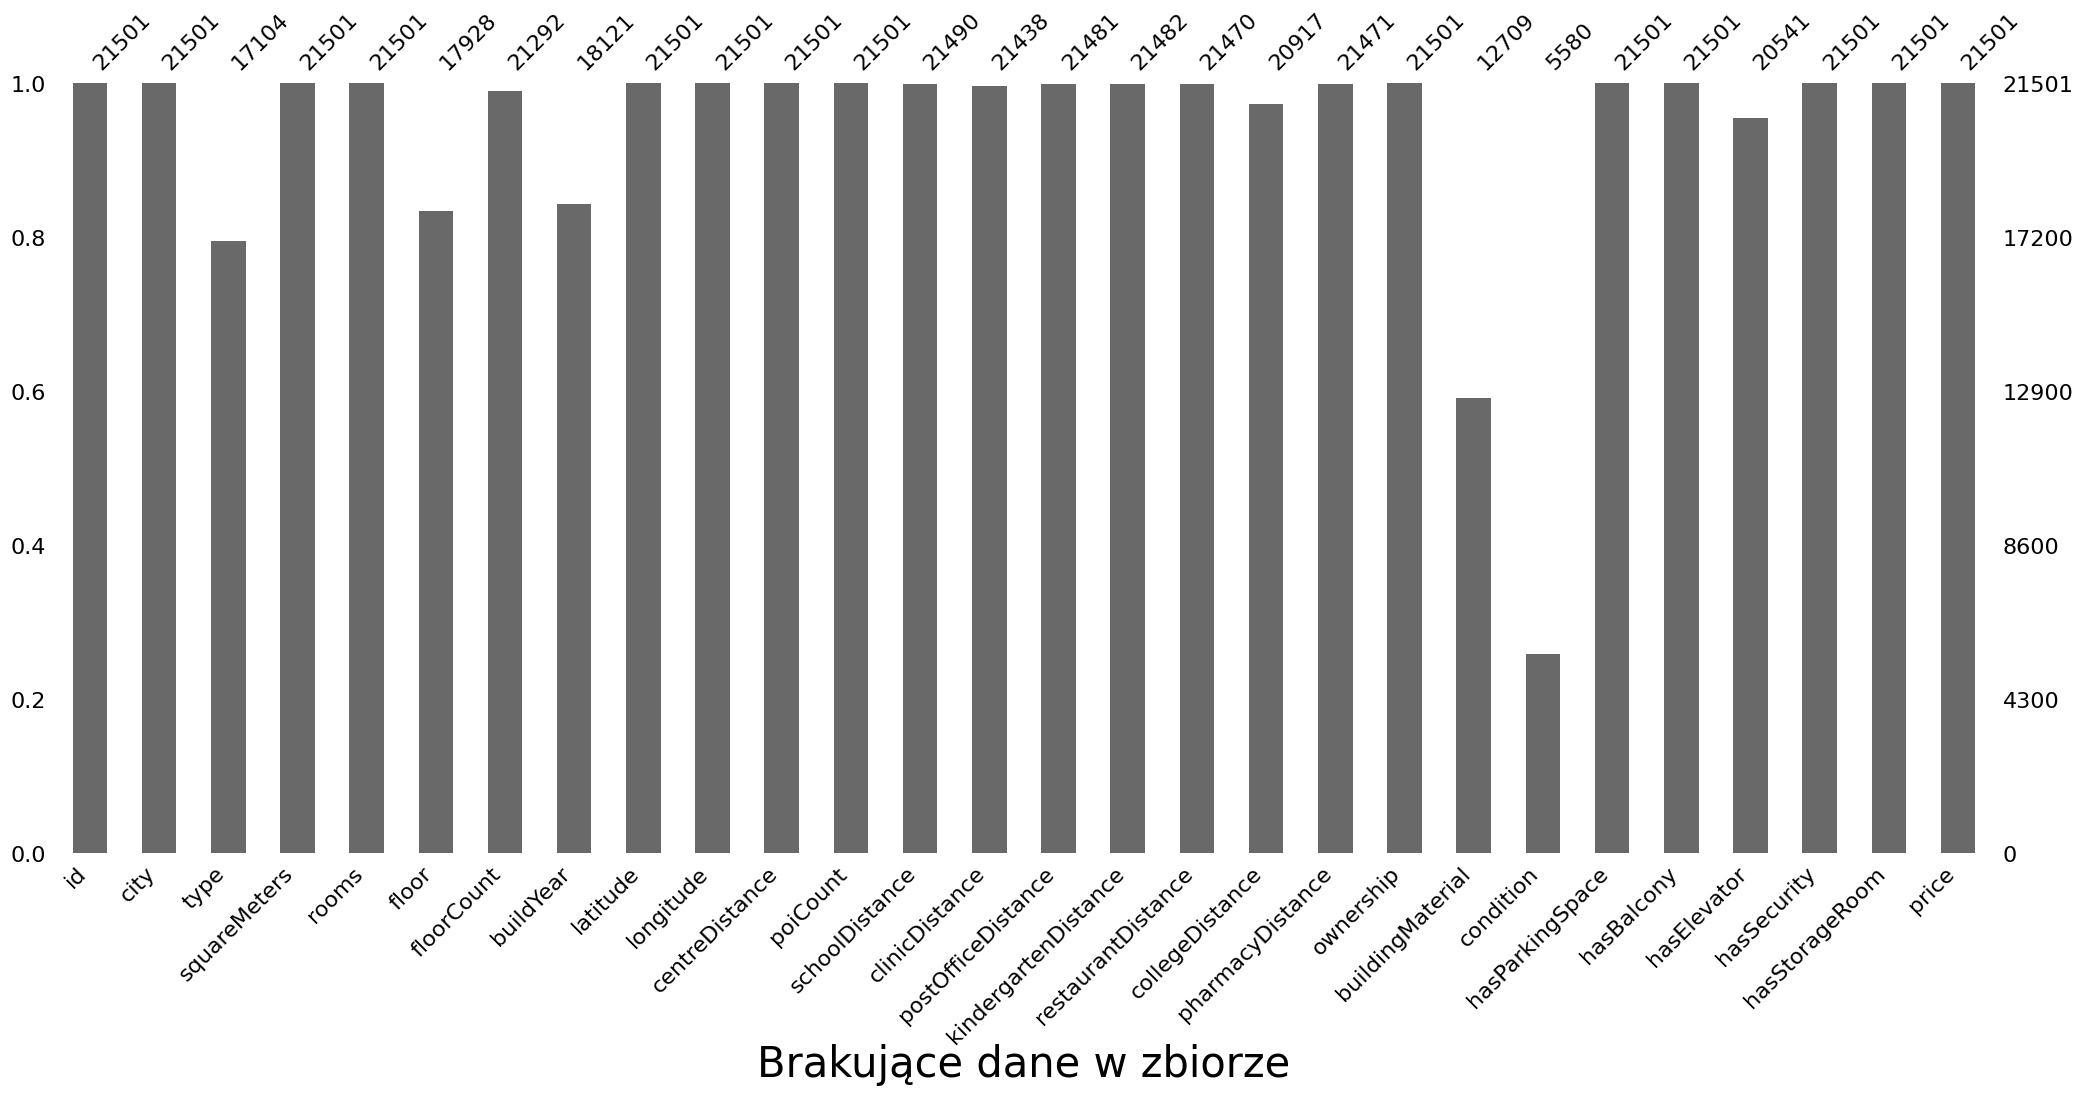

In [12]:

ax=msno.bar(df)

ax.set_title('Brakujące dane w zbiorze', y=-0.3, fontsize=30)

plt.show()

In [13]:
def is_special(x):
    if np.issubdtype(x.dtype, np.number):
        return ~np.isfinite(x)
    else:
        return x.isna()

df.apply(is_special)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21496,False,False,True,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,False,False,False
21497,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
21498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
21499,False,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [14]:
import numpy as np
import pandas as pd

# Definiujemy
def is_special(x):
    if np.issubdtype(x.dtype, np.number):
        return ~np.isfinite(x) # Zwraca True dla NaN oraz inf/-inf
    else:
        return x.isna()
total_special = df.apply(is_special).sum()
just_na = df.isna().sum()
def count_inf(x):
    if np.issubdtype(x.dtype, np.number):
        return np.isinf(x).sum()
    return 0

just_inf = df.apply(count_inf)

# Tabela podsumowującą
raport = pd.DataFrame({
    'Wszystkie Specjalne': total_special,
    'Tylko Braki (NA)': just_na,
    'Tylko Nieskończoności (Inf)': just_inf
})

# Filtrujemy, żeby pokazać tylko kolumny, gdzie cokolwiek wykryto
raport_z_bledami = raport[raport['Wszystkie Specjalne'] > 0]

print(raport_z_bledami)

                      Wszystkie Specjalne  Tylko Braki (NA)  \
type                                 4397              4397   
floor                                3573              3573   
floorCount                            209               209   
buildYear                            3380              3380   
schoolDistance                         11                11   
clinicDistance                         63                63   
postOfficeDistance                     20                20   
kindergartenDistance                   19                19   
restaurantDistance                     31                31   
collegeDistance                       584               584   
pharmacyDistance                       30                30   
buildingMaterial                     8792              8792   
condition                           15921             15921   
hasElevator                           960               960   

                      Tylko Nieskończoności (Inf)  
ty

In [15]:
# Liczba wierszy do odrzucenia (gdyby miały złą niską cenę)
liczba_do_odrzucenia = ((df["price"] < 150000)).sum()

print(f"Liczba ofert do odrzucenia: {liczba_do_odrzucenia}")


Liczba ofert do odrzucenia: 0


W zbiorze danych występują jedynie braki danych w postaci wartości NaN (braków typowych). Nie ma innych "specjalnych" braków, takich jak nieskończoności (Inf) czy wartości nieprawidłowe np. cena poniżej 150 tys złotych. W 06.2024 w największych miastach Poski mieszkanie nie mogłoby byc wystawione na sprzedaz za tą cenę.

<Figure size 1200x500 with 0 Axes>

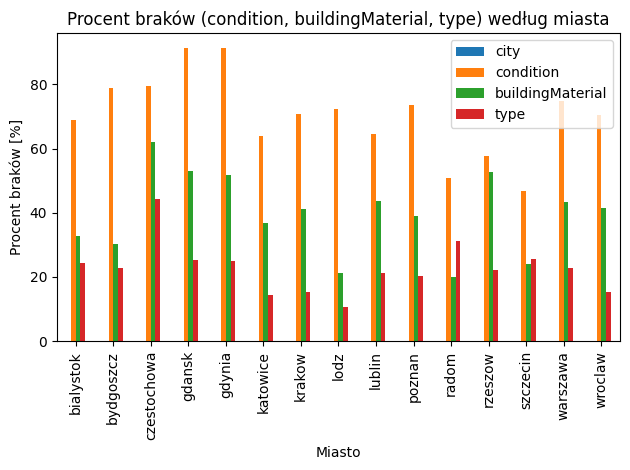

In [16]:


# --- Funkcja: procent braków wg miasta ---
def gg_miss_city_selected(df, 
                          city_col="city",
                          selected_cols=["condition", "buildingMaterial", "type"],
                          figsize=(12,5)):

    # filtr tylko wybranych kolumn
    df_selected = df[[city_col] + selected_cols]

    # liczba obserwacji w każdym mieście
    count_by_city = df_selected.groupby(city_col).size()

    # liczba braków w poszczególnych kolumnach wg miasta
    miss_count = df_selected.isna().groupby(df_selected[city_col]).sum()

    # procent braków = (liczba braków / liczba rekordów) * 100
    miss_pct = (miss_count.T / count_by_city).T * 100

    # wykres
    plt.figure(figsize=figsize)
    miss_pct.plot(kind="bar")
    plt.title("Procent braków (condition, buildingMaterial, type) według miasta")
    plt.ylabel("Procent braków [%]")
    plt.xlabel("Miasto")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# --- Wywołanie ---
gg_miss_city_selected(df)


In [17]:
# Obliczamy procent braków w danych
n_cols = df.shape[1]
city_counts = df.groupby("city").size()
missing_counts = df.groupby("city").apply(lambda g: g.isna().sum().sum())
missing_pct_by_city = (missing_counts / (city_counts * n_cols)) * 100

# Sortujemy malejąco i pokazujemy wynik
missing_pct_by_city = missing_pct_by_city.sort_values(ascending=False)
print(missing_pct_by_city)

# Najgorsze miasto pod względem braków
worst_city = missing_pct_by_city.index[0]
worst_pct = missing_pct_by_city.iloc[0]
print(f"\nMiasto z największym procentem braków: {worst_city} ({worst_pct:.2f}%)")

city
czestochowa    9.582560
gdynia         8.096101
gdansk         7.495324
bydgoszcz      6.735021
katowice       6.661046
poznan         6.575392
rzeszow        6.332165
warszawa       6.152276
krakow         5.976227
wroclaw        5.793546
lublin         5.711797
bialystok      5.674088
lodz           5.655994
szczecin       5.199823
radom          5.091575
dtype: float64

Miasto z największym procentem braków: czestochowa (9.58%)


/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_28194/3476469202.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_counts = df.groupby("city").apply(lambda g: g.isna().sum().sum())


Na przedstawionym wykresie kolumnowym widzimy udział brakujących wartości dla trzech zmiennych opisujących oferty mieszkaniowe analizowane w tym projekcie: condition, buildingMaterial oraz type, pogrupowanych według miasta. Brak definiujemy jako brak jednej zmiennej w danym ogłoszeniu.
Najbardziej wyróżnia się zmienna condition, która we wszystkich miastach charakteryzuje się zdecydowanie najwyższym odsetkiem braków. 
W przypadku pozostałych zmiennych udziały braków są mniejsze, choć zauważalnie zróżnicowane pomiędzy miastami. Co ciekawe, mimo że średni poziom braków w zmiennej buildingMaterial jest wyższy, to w części miast występuje odwrotna zależność — np. w Częstochowie i Gdansku odsetek braków dla type jest większy niż dla buildingMaterial.
Miasta o najniższej jakości pełnych informacji w ogłoszeniach to:

Częstochowa – niemal 10% wszystkich informacji w analizowanych zmiennych jest nieuzupełnionych,

Gdynia – około 8%,

Gdańsk – blisko 7,5%.

Wskazuje to, że w tych miastach użytkownicy rynku nieruchomości mogli częściej napotkać niekompletne opisy ofert w czerwcu 2024, co mogło utrudniac porównywanie mieszkań i podejmowanie decyzji zakupowych.

In [18]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, IterativeImputer

# 1. Grupa: Dane opisowe z dużymi brakami condition i buildingMaterial - usuwamy
df.drop(columns=['condition', 'buildingMaterial'], inplace=True)


# 2. Grupa: Numeryczne ważne (floor, buildYear,floorCount i wszystkie zmienne distance) 
import pandas as pd
import numpy as np


# A. Lista zmiennych, które chcesz naprawić metodą MICE
cols_to_impute = [
    'buildYear', 
    'floor', 
    'floorCount', 
    'centreDistance',
    'poiCount',
    'schoolDistance',
    'clinicDistance',
    'postOfficeDistance',
    'kindergartenDistance',
    'restaurantDistance',
    'collegeDistance',
    'pharmacyDistance'
]

# B. Konfiguracja imputera (random_state dla powtarzalności wyników)
iter_imputer = IterativeImputer(random_state=42)

# C. Wykonanie imputacji TYLKO na wybranych kolumnach
# Wynik fit_transform to macierz NumPy, więc przypisujemy ją z powrotem do tych samych kolumn w df
df[cols_to_impute] = iter_imputer.fit_transform(df[cols_to_impute])

# D. Zaokrąglamy rok budowy, piętro na którym znajduje się mieszkanie i liczbę pięter do liczb całkowitych zgodnie z logiką 
cols_integers = ['buildYear', 'floor', 'floorCount']

for col in cols_integers:
    # 
    df[col] = df[col].round().astype('Int64') # Int64 (z dużej litery) pozwala zachować format integer

# E. Sprawdzenie efektów (czy zniknęły braki w tych kolumnach)
print("Braki danych po MICE:")
print(df[cols_to_impute].isna().sum())

# 3. Grupa: Winda (binarna/kategoryczna) -> KNN Imputer
from sklearn.impute import KNNImputer
import numpy as np

# PRZYGOTOWANIE: Zamieniamy YES/NO na 1/0 
df['hasElevator'] = df['hasElevator'].map({'yes':1, 'no':0})
df['hasElevator'] = df['hasElevator'].astype(float)



from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#  Wybór cech: Winda (cel) + Lokalizacja + Cechy budynku
# Dodajemy latitude i longitude
features_knn = ['hasElevator', 'latitude', 'longitude', 'floorCount', 'buildYear']

#  PRZYGOTOWANIE DANYCH (Skalowanie)
# Tworzymy tymczasową kopię danych do obliczeń
df_temp = df[features_knn].copy()

# Zmieniamy na binarne
scaler = MinMaxScaler()
df_temp_scaled = pd.DataFrame(scaler.fit_transform(df_temp), columns=features_knn)

#  URUCHOMIENIE KNN NA PRZESKALOWANYCH DANYCH
# Teraz odległość geograficzna ma takie samo znaczenie jak rok budowy
knn_imputer = KNNImputer(n_neighbors=5)
df_filled_scaled = knn_imputer.fit_transform(df_temp_scaled)

#  ODZYSKANIE WYNIKU
# Wynik jest w skali 0-1. Interesuje nas tylko kolumna hasElevator (indeks 0 w features_knn)
# Musimy ją "odwrócić" ze skalowania lub po prostu zaokrąglić, 

# Wyciągamy kolumnę z macierzy (to są ułamki np. 0.8, 0.2)
imputed_values = df_filled_scaled[:, 0]

# Zaokrąglamy do 0 lub 1 i przypisujemy do oryginalnego DataFrame
df['hasElevator'] = imputed_values.round().astype('int64')

# Sprawdzenie
print("Braki po KNN z lokalizacją:", df['hasElevator'].isna().sum())


## teraz imputacja zmiennej typu budynku (type) za pomocą KNN z lokalizacją

#  WYBÓR CECH 
# Typ budynku zależy mocno od: roku budowy, liczby pięter i lokalizacji.
features = ['latitude', 'longitude', 'buildYear', 'floorCount']
target = 'type'

# PRZYGOTOWANIE DANYCH
# Musimy podzielić dane na dwie grupy:
# A. Treningowe: Tam gdzie ZNAMY typ (uczymy się na nich)
# B. Do uzupełnienia: Tam gdzie typ to NaN (będziemy zgadywać)
train_data = df[df[target].notna()].copy()
missing_data = df[df[target].isna()].copy()


if len(missing_data) > 0:
    
    # 3. SKALOWANIE 
    # Żeby rok budowy (2000) nie zdominował współrzędnych (52.00)
    scaler = MinMaxScaler()
    
    # Skalujemy cechy w obu zestawach
    X_train = scaler.fit_transform(train_data[features])
    X_missing = scaler.transform(missing_data[features]) 
    
    y_train = train_data[target]

    # 4. KONFIGURACJA I NAUKA (Głosowanie)
    # n_neighbors=10: Bierzemy pod uwagę 10 najbliższych sąsiadów.
    # weights='distance': Bliżsi sąsiedzi mają ważniejszy głos.
    from sklearn.neighbors import KNeighborsClassifier
    knn_classifier = KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn_classifier.fit(X_train, y_train)

    # 5. PRZEWIDYWANIE (Uzupełnianie braków)
    predicted_types = knn_classifier.predict(X_missing)

    # 6. WSTAWIENIE DO TABELI
    # Wstawiamy przewidziane wartości tylko tam, gdzie były braki
    df.loc[df[target].isna(), target] = predicted_types

    print("Sukces! Braki w 'type' po głosowaniu sąsiadów:", df['type'].isna().sum())
    
else:
    print("Brak brakujących danych w kolumnie 'type'.")



# 5.Sprawdzenie
print("Pozostałe braki:", df.isna().sum().sum())

Braki danych po MICE:
buildYear               0
floor                   0
floorCount              0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
dtype: int64
Braki po KNN z lokalizacją: 0
Sukces! Braki w 'type' po głosowaniu sąsiadów: 0
Pozostałe braki: 0


In [19]:
# Pokaż kolumny i liczbę brakujących wartości (oraz procent braków)
missing_count = df.isna().sum()
missing_pct = df.isna().mean() * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct': missing_pct
}).sort_values(by='missing_count', ascending=False)

# Wyświetl wszystkie kolumny (posortowane malejąco według liczby braków)
print(missing_summary)

# Tylko kolumny z brakami:
print("\nKolumny z brakami:")
print(missing_summary[missing_summary['missing_count'] > 0])

                      missing_count  missing_pct
id                                0          0.0
city                              0          0.0
hasStorageRoom                    0          0.0
hasSecurity                       0          0.0
hasElevator                       0          0.0
hasBalcony                        0          0.0
hasParkingSpace                   0          0.0
ownership                         0          0.0
pharmacyDistance                  0          0.0
collegeDistance                   0          0.0
restaurantDistance                0          0.0
kindergartenDistance              0          0.0
postOfficeDistance                0          0.0
clinicDistance                    0          0.0
schoolDistance                    0          0.0
poiCount                          0          0.0
centreDistance                    0          0.0
longitude                         0          0.0
latitude                          0          0.0
buildYear           

Wnioskowanie statystyczne

In [20]:
# Dodawanie zmiennej 'price_per_m2'
df['pricePerM2'] = df['price'] / df['squareMeters']   
print(df)

                                     id       city               type  \
0      811891f98a870dfd6e414374a0a85560   szczecin       blockOfFlats   
1      adaf636d0c44d8d9325bce42403eefee   szczecin  apartmentBuilding   
2      9b957bd60885a469c96f17b58a914f4b   szczecin  apartmentBuilding   
3      74fef2ff7135bc70797a3fbfd7d44ed6   szczecin       blockOfFlats   
4      77cc78c75b0d09bf84d6d3124a28803c   szczecin       blockOfFlats   
...                                 ...        ...                ...   
21496  ca83fdbc19c1e62e1cc6b6b21dcd5e03  bydgoszcz       blockOfFlats   
21497  204c93689b7cdc62a17ef3c0dbf7034a  bydgoszcz           tenement   
21498  bb19da639a2de8bba49be2ca49053c87  bydgoszcz           tenement   
21499  1e7f4f1fdfea31eb84e071d697839632  bydgoszcz           tenement   
21500  60fcbfa2a2a48ebcc2e554efba7f2729  bydgoszcz           tenement   

       squareMeters  rooms  floor  floorCount  buildYear   latitude  \
0             47.00    2.0      6          12       

In [21]:
# Zamiana zmiennych binarnych kategorycznych z 'yes'/'no' na 1/0
cols = ["hasParkingSpace", "hasBalcony", "hasSecurity", "hasStorageRoom"]
for col in cols:
    print(col, df[col].unique())

df[cols] = df[cols].applymap(lambda x: 1 if x == 'yes' else 0)
df.head()

hasParkingSpace ['no' 'yes']
hasBalcony ['yes' 'no']
hasSecurity ['no' 'yes']
hasStorageRoom ['yes' 'no']


/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_28194/3660179200.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(lambda x: 1 if x == 'yes' else 0)


,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,pricePerM2
0,811891f98a870dfd6e414374a0a85560,szczecin,blockOfFlats,47.00,2.0,6,12,1981,53.428544,14.552812,...,0.593,0.085,condominium,0,1,1,0,1,449000,9553.191489
1,adaf636d0c44d8d9325bce42403eefee,szczecin,apartmentBuilding,88.22,3.0,1,2,2000,53.449093,14.516844,...,1.192,0.668,condominium,1,1,0,0,0,950000,10768.533212
2,9b957bd60885a469c96f17b58a914f4b,szczecin,apartmentBuilding,117.00,5.0,4,4,1983,53.443096,14.561348,...,1.522,0.229,udział,1,1,0,0,0,1099000,9393.162393
3,74fef2ff7135bc70797a3fbfd7d44ed6,szczecin,blockOfFlats,33.31,1.0,1,4,1963,53.436100,14.541200,...,0.041,0.388,cooperative,1,0,0,1,1,380000,11407.985590
4,77cc78c75b0d09bf84d6d3124a28803c,szczecin,blockOfFlats,56.00,3.0,7,7,2018,53.447465,14.557811,...,1.643,0.178,condominium,1,1,1,1,1,799000,14267.857143


In [22]:
# Sprawdzenie czy próba jest wystarczająca

n = len(df)
print("Liczba obserwacji:", n)

# Reguła kciuka – dla średniej zazwyczaj n > 30 wystarcza
print("Czy próba jest wystarczająca do estymacji średniej? ->", n > 30)

# Dla proporcji – min 10 sukcesów i 10 porażek
def check_proportion_condition(series):
    successes = (series == 1).sum()
    failures = (series == 0).sum()
    return successes >= 10 and failures >= 10

print("Czy dla zmiennych binarnych jest wystarczająca ilość sukcesów i porażek?")
for col in ["hasParkingSpace", "hasBalcony", "hasElevator", "hasSecurity", "hasStorageRoom"]:
    print(col, check_proportion_condition(df[col]))

Liczba obserwacji: 21501
Czy próba jest wystarczająca do estymacji średniej? -> True
Czy dla zmiennych binarnych jest wystarczająca ilość sukcesów i porażek?
hasParkingSpace True
hasBalcony True
hasElevator True
hasSecurity True
hasStorageRoom True


--- 1. Macierz Korelacji Spearmana (ρ) dla Zmiennych Ilościowych (Q-Q) ---


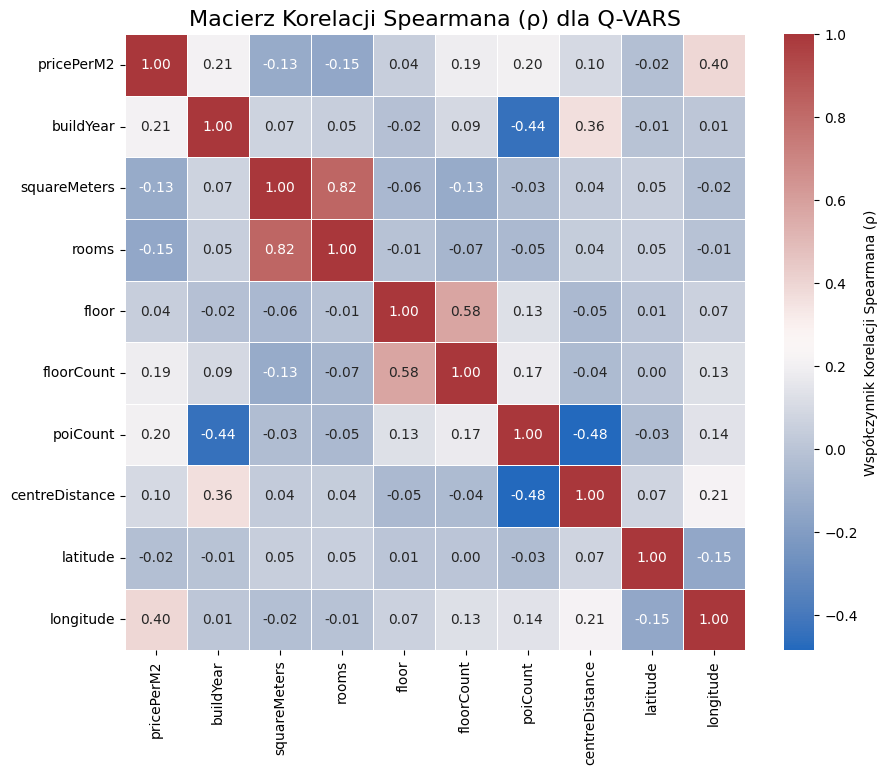


--- 2. Macierz Siły Związku Craméra V dla Zmiennych Jakościowych (C-C) ---


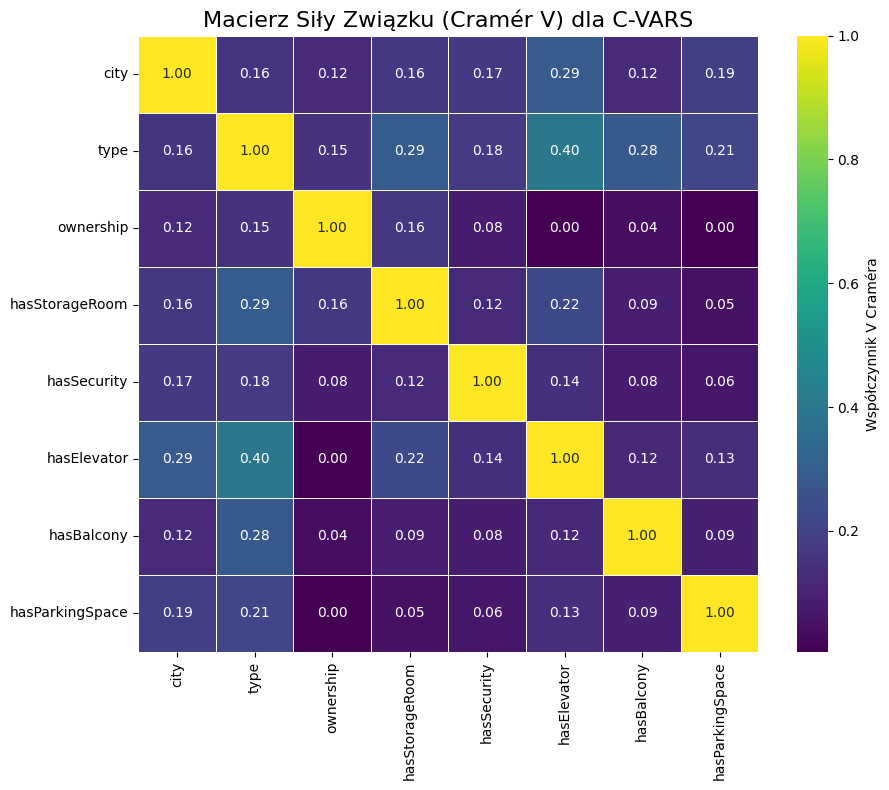

--- 📊 Macierz Korelacji dla WSZYSTKICH Zmiennych Ilościowych i Jakościowych Porządkowych (N=21501) ---
Użyto wszystkich 21501 wierszy po usunięciu pełnych braków.
Zmienne numeryczne (Q) użyte: 22
Zmienne kategoryczne (C) użyte: 3


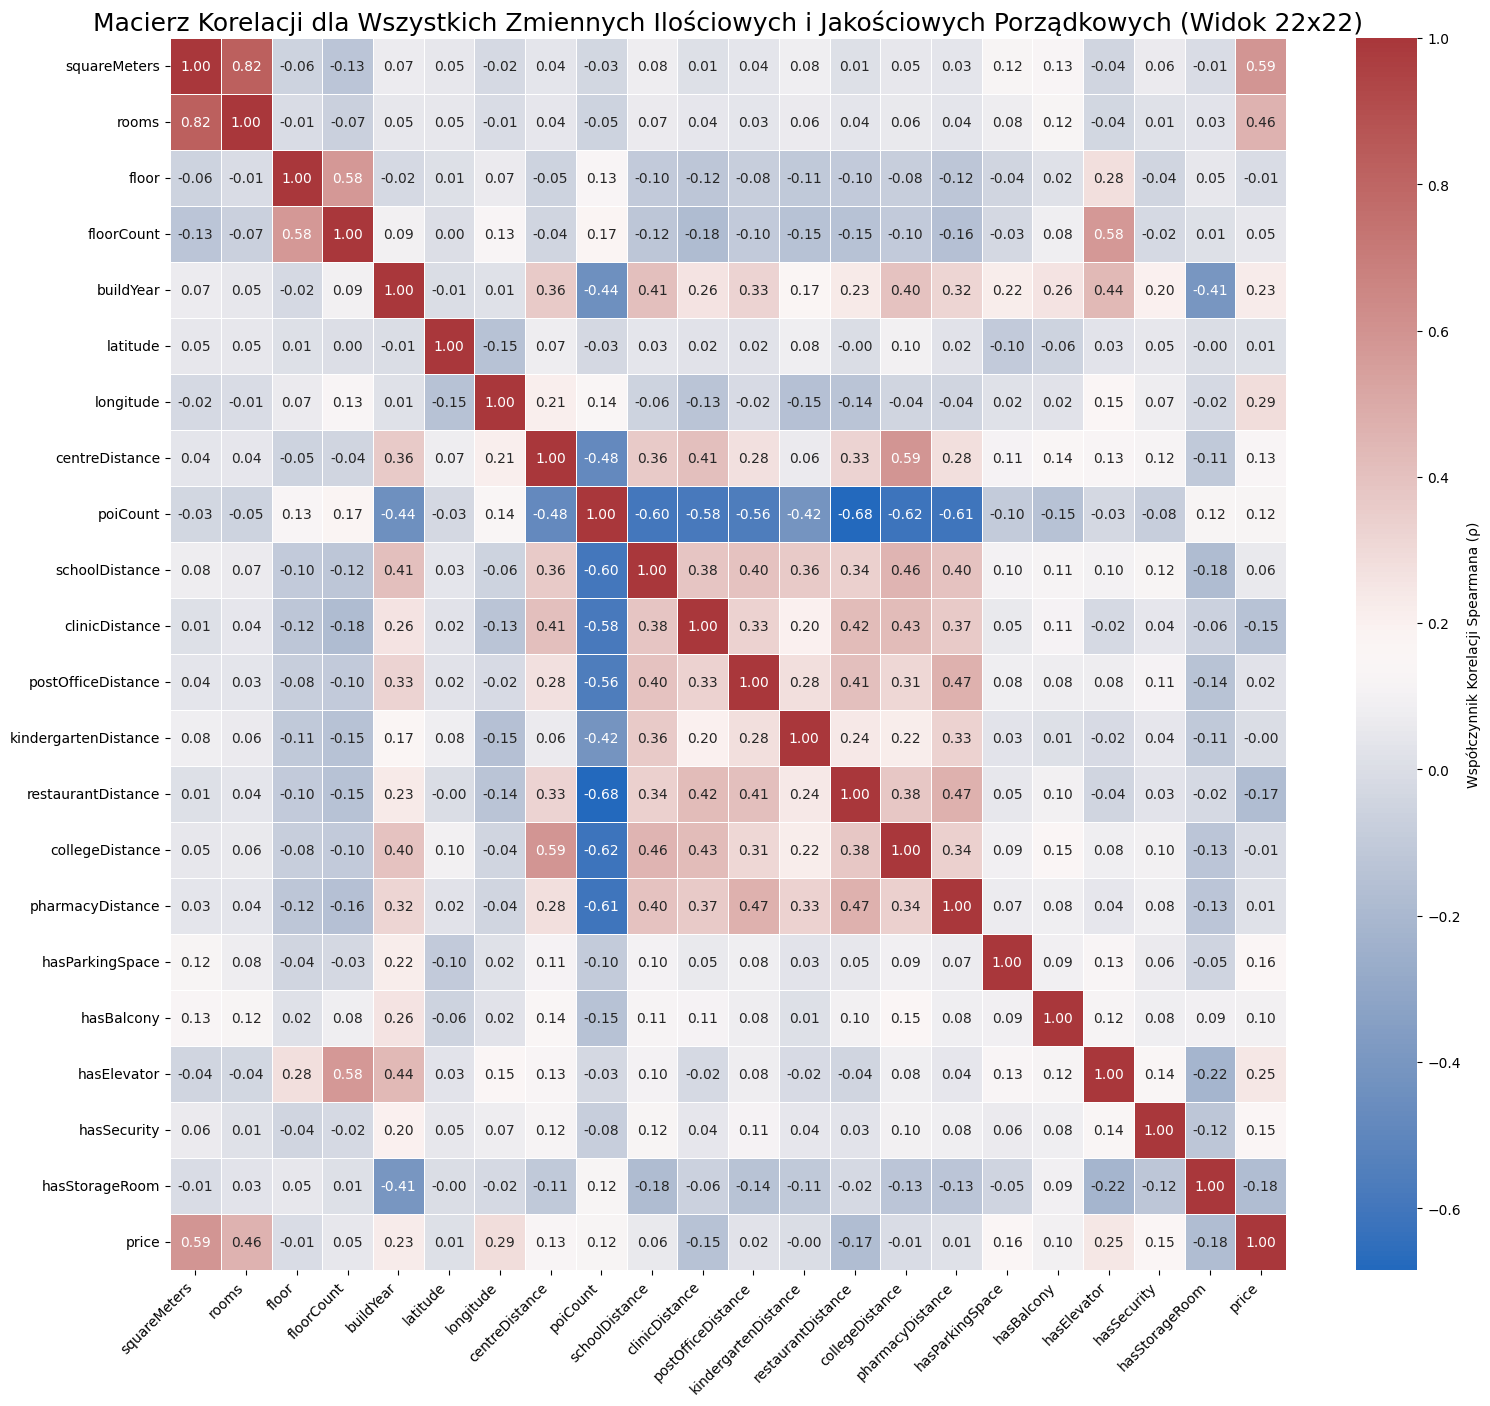

In [27]:
# -----------------------------
# 1. Macierze Korelacji
# -----------------------------
from itertools import combinations
from scipy.stats import chi2_contingency

# Zmienne Ilościowe (Q-VARS)
Q_VARS = ['pricePerM2', 'buildYear', 'squareMeters', 'rooms', 'floor', 'floorCount', 
          'poiCount', 'centreDistance', 'latitude', 'longitude']
# Zmienne Jakościowe (C-VARS)
C_VARS = ['city', 'type', 'ownership', 'hasStorageRoom', 'hasSecurity', 
          'hasElevator', 'hasBalcony', 'hasParkingSpace']


# --- SEKCJA 1: KORELACJA ILOŚCIOWE vs. ILOŚCIOWE (SPEARMAN ρ) ---

print("--- 1. Macierz Korelacji Spearmana (ρ) dla Zmiennych Ilościowych (Q-Q) ---")

# Filtracja, usuwanie NaN i obliczanie macierzy korelacji
correlation_matrix_q = df[Q_VARS].dropna().corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix_q,
    annot=True,        
    cmap='vlag',       
    fmt=".2f",         
    linewidths=.5,     
    cbar_kws={'label': 'Współczynnik Korelacji Spearmana (ρ)'}
)
plt.title('Macierz Korelacji Spearmana (ρ) dla Q-VARS', fontsize=16)
plt.show()

# 


# --- SEKCJA 2: KORELACJA JAKOŚCIOWE vs. JAKOŚCIOWE (CRAMÉR V) ---

# Funkcja do obliczania Craméra V
def cramers_v(contingency_table):
    """Oblicza współczynnik Craméra V (siła związku zmiennych jakościowych)."""
    if contingency_table.empty or contingency_table.sum().sum() == 0:
        return 0.0
    
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    
    # Zabezpieczenie przed dzieleniem przez zero
    denominator = min(r - 1, k - 1)
    if denominator == 0:
        return 0.0
        
    phi2 = chi2 / n
    v = np.sqrt(phi2 / denominator)
    return v

print("\n--- 2. Macierz Siły Związku Craméra V dla Zmiennych Jakościowych (C-C) ---")

# Inicjalizacja macierzy Craméra V
v_matrix = pd.DataFrame(index=C_VARS, columns=C_VARS, dtype=float)
np.fill_diagonal(v_matrix.values, 1.0)

# Usuwamy wiersze z NaN dla stabilności obliczeń C-C
df_clean_c = df.dropna(subset=C_VARS).copy()

# Obliczanie V Craméra dla wszystkich par
for var1, var2 in combinations(C_VARS, 2):
    contingency_table = pd.crosstab(df_clean_c[var1], df_clean_c[var2])
    v_value = cramers_v(contingency_table)
    
    v_matrix.loc[var1, var2] = v_value
    v_matrix.loc[var2, var1] = v_value

# Wizualizacja Macierzy Korelacji Craméra V
plt.figure(figsize=(10, 8))
sns.heatmap(
    v_matrix,
    annot=True,        
    cmap='viridis',    
    fmt=".2f",         
    linewidths=.5,     
    cbar_kws={'label': 'Współczynnik V Craméra'}
)
plt.title("Macierz Siły Związku (Cramér V) dla C-VARS", fontsize=16)
plt.show()

# --- Ustawienia stabilności ---
SAMPLE_SIZE = 21501
MATRIX_VISUAL_LIMIT = 30 # Ograniczenie wizualizacji
EXCLUDE_VARS = ['id', 'pricePerM2']

print(f"--- 📊 Macierz Korelacji dla WSZYSTKICH Zmiennych Ilościowych i Jakościowych Porządkowych (N={SAMPLE_SIZE}) ---")

# 1. Redukcja Próby i Usuwanie NaN
df_clean = df.copy().dropna(how='all')

if len(df_clean) > SAMPLE_SIZE:
    df_sampled = df_clean.sample(SAMPLE_SIZE, random_state=42).copy()
    print(f"Dane ograniczone do losowej próby {SAMPLE_SIZE} wierszy.")
else:
    df_sampled = df_clean.copy()
    print(f"Użyto wszystkich {len(df_sampled)} wierszy po usunięciu pełnych braków.")


# 2. Dynamiczna identyfikacja typów zmiennych i WYKLUCZENIE zmiennych
all_cols = df_sampled.columns.tolist()

# a) Zmienne do przetworzenia (z wyłączeniem 'id' i 'pricePerM2')
cols_to_process = [col for col in all_cols if col not in EXCLUDE_VARS]

# b) Klasyfikacja na Q i C
df_temp = df_sampled[cols_to_process].copy()
numerical_cols = df_temp.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_temp.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Zmienne numeryczne (Q) użyte: {len(numerical_cols)}")
print(f"Zmienne kategoryczne (C) użyte: {len(categorical_cols)}")

# 3. Kodowanie One-Hot Encoding (OHE)
df_encoded = pd.get_dummies(df_temp, columns=categorical_cols, prefix=categorical_cols, drop_first=True)

# 4. Obliczenie Macierzy Korelacji Spearmanem (ρ)
combined_correlation_matrix = df_encoded[df_encoded.select_dtypes(include=np.number).columns].corr(method='spearman')

# 5. Wizualizacja
final_size = min(len(combined_correlation_matrix), MATRIX_VISUAL_LIMIT)

plt.figure(figsize=(18, 16))
sns.heatmap(
    combined_correlation_matrix.iloc[:final_size, :final_size],
    # POPRAWKA 1: Ustawienie annot=True, aby wyświetlić wartości
    annot=True, 
    # POPRAWKA 2: Ustawienie formatowania do dwóch miejsc po przecinku
    fmt=".2f",
    cmap='vlag',
    linewidths=.5,
    cbar_kws={'label': 'Współczynnik Korelacji Spearmana (ρ)'}
)
plt.title(f'Macierz Korelacji dla Wszystkich Zmiennych Ilościowych i Jakościowych Porządkowych (Widok {final_size}x{final_size})', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Analiza korelacji Spearmana na zmiennych ilościowych oraz identyfikacja związków jakościowych pozwoliła na określenie kluczowych zależności w danych rynkowych. W zbiorze danych dominuje wysoka dodatnia korelacja między zmiennymi wyrażającymi odległość od konkretnych punktów użyteczności publicznej (np. pharmacyDistance, collegeDistance) oraz zmienną pokazującą odległość od centrum (centreDistance). Oznacza to, że punkty POI są zlokalizowane blisko siebie w przestrzeni miejskiej. Jednocześnie, zmienne te wykazują silną ujemną korelację ze zmienną poiCount, co potwierdza, że im dalej od centrum, tym mniejsza jest ogólna liczba dostępnych punktów użyteczności publicznej w pobliżu. Poza oczywistymi zależnościami, takimi jak silna dodatnia korelacja między liczbą pokoi (rooms) a powierzchnią (squareMeters), wyciągnęliśmy bardziej interesujące wnioski. Zauważalna dodatnia korelacja wynosząca około 0.36 między rokiem budowy (buildYear) a odległością od centrum sugeruje, że nowsze budynki statystycznie częściej znajdują się dalej od ścisłego centrum miasta, co odzwierciedla ekspansję urbanistyczną. Ciekawa jest również silna dodatnia korelacja wynosząca około 0.59 między odległością od centrum a odległością od uniwersytetów (collegeDistance), co wyraźnie wskazuje na to, że większość uczelni wyższych jest położona w centrum lub jego bezpośrednim sąsiedztwie. Zauważyliśmy także istotną zależność między typem budynku a faktem posiadania windy (hasElevator), co sugeruje, że występowanie windy jest silnie skorelowane z kategorią zabudowy (np. nowsze apartamentowce mają windy częściej niż kamienice), co zostało pogłębione w osobnej analizie wizualnej.

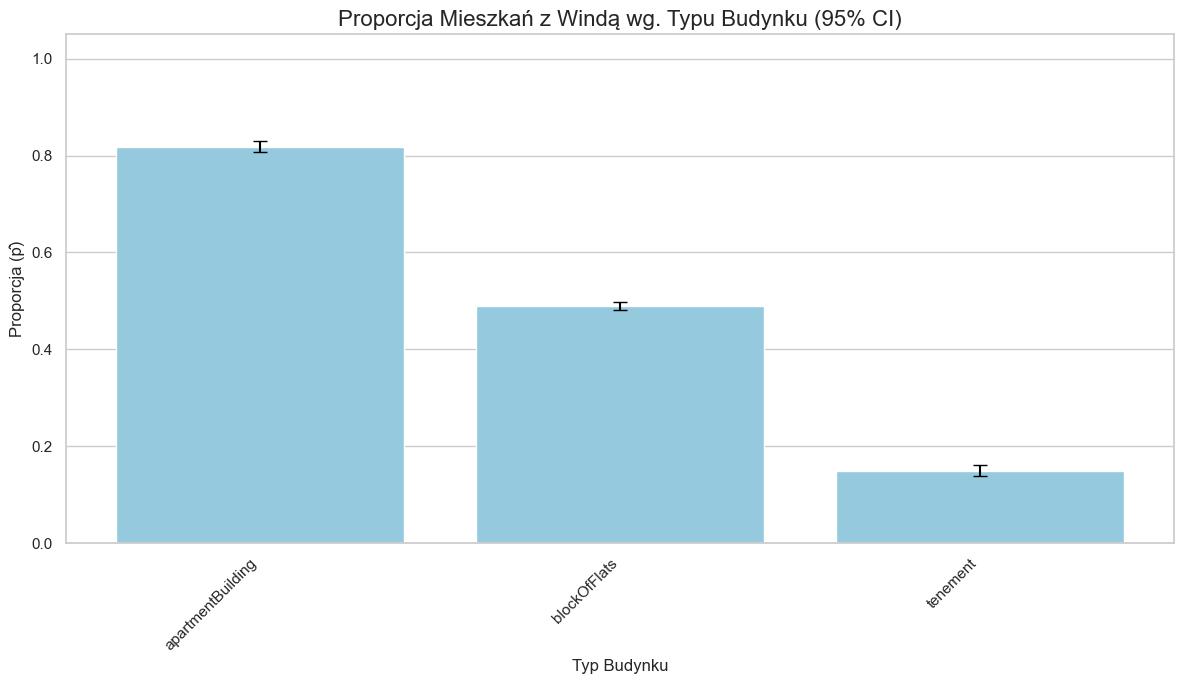

## Tabela Kontyngencji (type vs. hasElevator):
hasElevator            0      1    All
type                                  
apartmentBuilding    776   3492   4268
blockOfFlats        6999   6736  13735
tenement            2974    524   3498
All                10749  10752  21501

-----------------------------------------------------
## Wyniki Testu Chi-Kwadrat
Statystyka Chi-Kwadrat (χ²): 3449.380
Stopnie Swobody (df): 2
P-value: 0.00000e+00
Poziom Istotności (α): 0.05

## Wnioskowanie
P-value (0.00000e+00) jest MNIEJSZE niż 0.05.
Wniosek: Odrzucamy Hipotezę Zerową (H₀). Różnice w proporcjach występowania windy między typami budynków są **ISTOTNE STATYSTYCZNIE**.


In [30]:
# -----------------------------
# 2. Proporcja Mieszkań Posiadających Windę: Analiza Porównawcza Występowania Wind w Różnych Typach Budynku
# -----------------------------
from scipy import stats

# Ustawienie estetyki wykresów
sns.set_theme(style="whitegrid")
TARGET_VAR = 'hasElevator'
GROUP_VAR = 'type'
CONFIDENCE_LEVEL = 0.95
Z_SCORE = stats.norm.ppf(1 - (1 - CONFIDENCE_LEVEL) / 2) # Z dla 95% CI

# 1. Funkcja do obliczania CI
def calculate_proportion_ci(group):
    data = group.dropna()
    n = len(data)
    
    if n < 30 or data.std() == 0:
        return pd.Series({'p_hat': np.nan, 'ci_lower': np.nan, 'ci_upper': np.nan, 'n': n, 'moe': np.nan})
        
    p_hat = data.mean() 
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    moe = Z_SCORE * se 
    
    ci_lower = max(0, p_hat - moe)
    ci_upper = min(1, p_hat + moe)
    
    return pd.Series({
        'p_hat': p_hat,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'n': n,
        'moe': moe
    })

# 2. Grupuj i oblicz CI
df[TARGET_VAR] = pd.to_numeric(df[TARGET_VAR], errors='coerce').fillna(0).astype(int) 
df_clean = df.dropna(subset=[GROUP_VAR, TARGET_VAR])

ci_by_type = df_clean.groupby(GROUP_VAR)[TARGET_VAR].apply(calculate_proportion_ci).unstack()

# Filtracja i sortowanie
ci_by_type = ci_by_type.dropna(subset=['p_hat'])
ci_by_type = ci_by_type[ci_by_type['n'] >= 30]
ci_by_type = ci_by_type.sort_values(by='p_hat', ascending=False)


# 3. Wizualizacja Bar Plot z Error Bars
plt.figure(figsize=(12, 7))

# Wykres słupkowy proporcji
sns.barplot(
    x=ci_by_type.index, 
    y=ci_by_type['p_hat'],
    color='skyblue',
    errorbar=None,
    ax=plt.gca()
)

# Dodanie error bars (CI)
plt.errorbar(
    x=ci_by_type.index, 
    y=ci_by_type['p_hat'], 
    yerr=ci_by_type['moe'], 
    fmt='none', 
    capsize=5, 
    color='black',
    elinewidth=1.5
)

# Etykiety i tytuł
plt.title(f'Proporcja Mieszkań z Windą wg. Typu Budynku (95% CI)', fontsize=16)
plt.xlabel('Typ Budynku', fontsize=12)
plt.ylabel('Proporcja (p̂)', fontsize=12)
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tabela sumuje liczności dla każdej kombinacji (typ budynku vs. ma windę/nie ma windy)
contingency_table = pd.crosstab(df_clean[GROUP_VAR], df_clean[TARGET_VAR], margins=True, dropna=True)

print("## Tabela Kontyngencji (type vs. hasElevator):")
print(contingency_table)

# 3. Wykonanie Testu Chi-Kwadrat
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table.iloc[:-1, :-1]) # Wykluczamy marginesy
ALPHA = 0.05
print("\n-----------------------------------------------------")
print("## Wyniki Testu Chi-Kwadrat")
print(f"Statystyka Chi-Kwadrat (χ²): {chi2_stat:.3f}")
print(f"Stopnie Swobody (df): {dof}")
print(f"P-value: {p_value:.5e}")
print(f"Poziom Istotności (α): {ALPHA}")

# 4. Wnioskowanie
print("\n## Wnioskowanie")

if p_value < ALPHA:
    print(f"P-value ({p_value:.5e}) jest MNIEJSZE niż {ALPHA}.")
    print("Wniosek: Odrzucamy Hipotezę Zerową (H₀). Różnice w proporcjach występowania windy między typami budynków są **ISTOTNE STATYSTYCZNIE**.")
else:
    print(f"P-value ({p_value:.5e}) jest WIĘKSZE niż {ALPHA}.")
    print("Wniosek: Nie ma podstaw do odrzucenia H₀. Różnice nie są istotne statystycznie.")

Przeprowadzona analiza wykazała, że występowanie windy w mieszkaniach różni się istotnie w zależności od typu budynku. Największą proporcję mieszkań wyposażonych w windę obserwujemy w grupie „apartmentBuilding” (ok. 82%), nieco mniejszą w „blockOfFlats” (ok. 49%), a najmniejszą w „tenement” (ok. 15%). Wyniki testu Chi-kwadrat (χ² = 3449,38, p < 0,001) wskazują, że te różnice są istotne statystycznie, co oznacza, że typ budynku ma realny wpływ na prawdopodobieństwo posiadania windy w mieszkaniu.

--- 📊 Badanie Normalności Rozkładu 'price' ---
Liczba obserwacji po usunięciu NaN: N = 21501


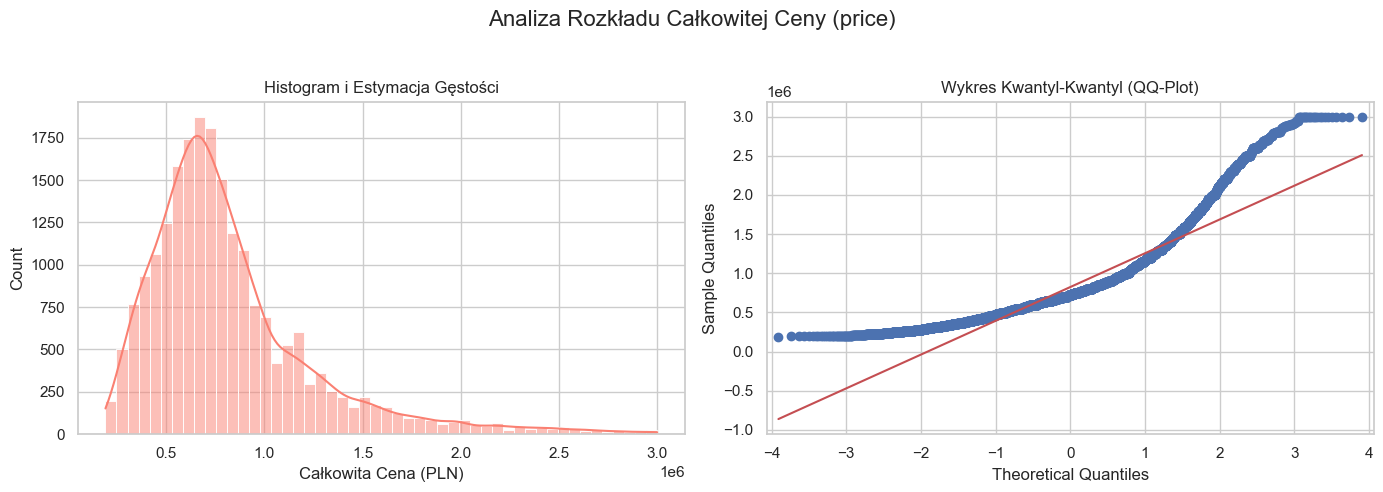


## Wyniki Testów Formalnych (H0: Rozkład jest normalny)
1. Test D'Agostino-Pearsona: p-value = 0.00000e+00
2. Test Shapiro-Wilka: p-value = 1.78186e-86

## Wnioskowanie
P-value D'Agostino-Pearsona (0.00000e+00) jest MNIEJSZE niż 0.05.
Wniosek: Odrzucamy hipotezę zerową (H0). Rozkład całkowitej ceny **NIE JEST normalny**.
Charakterystyka: Rozkład jest silnie prawostronnie skośny.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21501.
  res = hypotest_fun_out(*samples, **kwds)


In [82]:
# -----------------------------
# 3. Badanie Normalności Rozkładu Całkowitej Ceny
# -----------------------------
# Ustawienie stylu
sns.set_theme(style="whitegrid")

# Ustawienie zmiennej do analizy
VARIABLE = 'price'

# 1. Przygotowanie danych i obsługa braków
data = df[VARIABLE].dropna()

print(f"--- 📊 Badanie Normalności Rozkładu '{VARIABLE}' ---")
print(f"Liczba obserwacji po usunięciu NaN: N = {len(data)}")

# 2. Wizualna Weryfikacja (Histogram i QQ-Plot)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f"Analiza Rozkładu Całkowitej Ceny ({VARIABLE})", fontsize=16)

# a) Histogram z krzywą gęstości
sns.histplot(data, kde=True, ax=axes[0], color='salmon', bins=50)
axes[0].set_title('Histogram i Estymacja Gęstości')
axes[0].set_xlabel('Całkowita Cena (PLN)')

# b) Wykres Kwantyl-Kwantyl (QQ-Plot)
# Porównuje kwantyle danych z kwantylami rozkładu normalnego.
sm.qqplot(data, line='s', ax=axes[1]) 
axes[1].set_title('Wykres Kwantyl-Kwantyl (QQ-Plot)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 

# 3. Formalne Testy Statystyczne

# A. Test D'Agostino-Pearsona (zalecany dla dużych prób, N > 20)
k2, p_dagostino = stats.normaltest(data)

# B. Test Shapiro-Wilka (dla N > 5000 wykonujemy na losowej próbce)
if len(data) > 5000:
    sample_data = data.sample(21501, random_state=42)
    sw_stat, p_shapiro = stats.shapiro(sample_data)
else:
    sw_stat, p_shapiro = stats.shapiro(data)

print("\n## Wyniki Testów Formalnych (H0: Rozkład jest normalny)")
print(f"1. Test D'Agostino-Pearsona: p-value = {p_dagostino:.5e}")
print(f"2. Test Shapiro-Wilka: p-value = {p_shapiro:.5e}")

# 4. Wnioskowanie
ALPHA = 0.05

print("\n## Wnioskowanie")

if p_dagostino < ALPHA:
    print(f"P-value D'Agostino-Pearsona ({p_dagostino:.5e}) jest MNIEJSZE niż {ALPHA}.")
    print("Wniosek: Odrzucamy hipotezę zerową (H0). Rozkład całkowitej ceny **NIE JEST normalny**.")
    print("Charakterystyka: Rozkład jest silnie prawostronnie skośny.")
else:
    print("Wniosek: Nie ma podstaw do odrzucenia H0.")

Dla lepszego zrozumienia rozkładu naszej kluczowej zmiennej, czyli całkowitej ceny mieszkań, przeprowadzono analizę normalności. Wykonany został Test Shapiro-Wilka oraz test D’Agostino-Pearsona. Wyniki obu testów wskazują na bardzo niskie p-value (p < 0,001), co prowadzi do odrzucenia hipotezy zerowej o normalności rozkładu. Oznacza to, że rozkład całkowitej ceny nie jest normalny i cechuje się silną prawostronną asymetrią – istnieje więcej mieszkań o cenach niższych, a kilka wysokich cen powoduje długi prawy ogon rozkładu.
Takie wnioski są istotne przy wyborze metod statystycznych i interpretacji wyników, ponieważ wiele klasycznych testów zakłada normalność danych.

--- Wizualizacja CI dla Miast ---


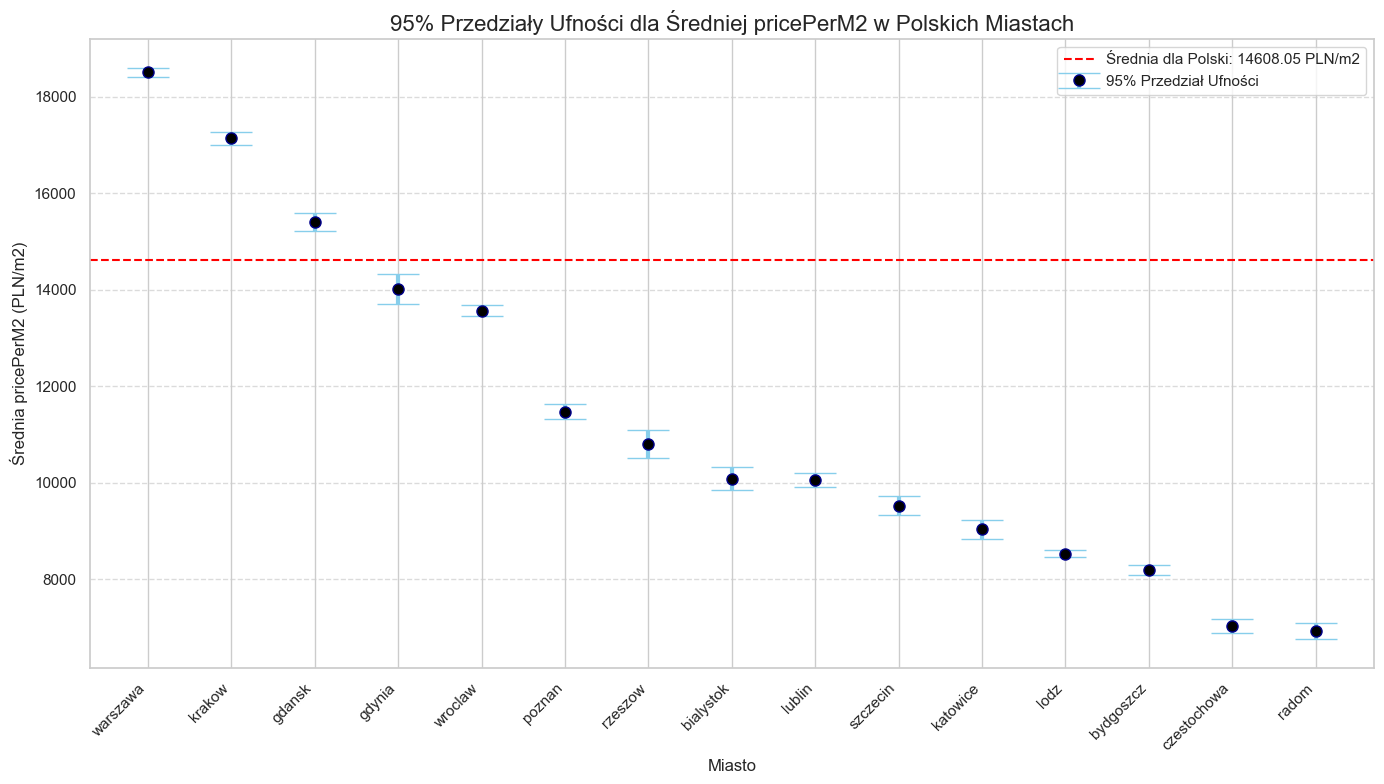

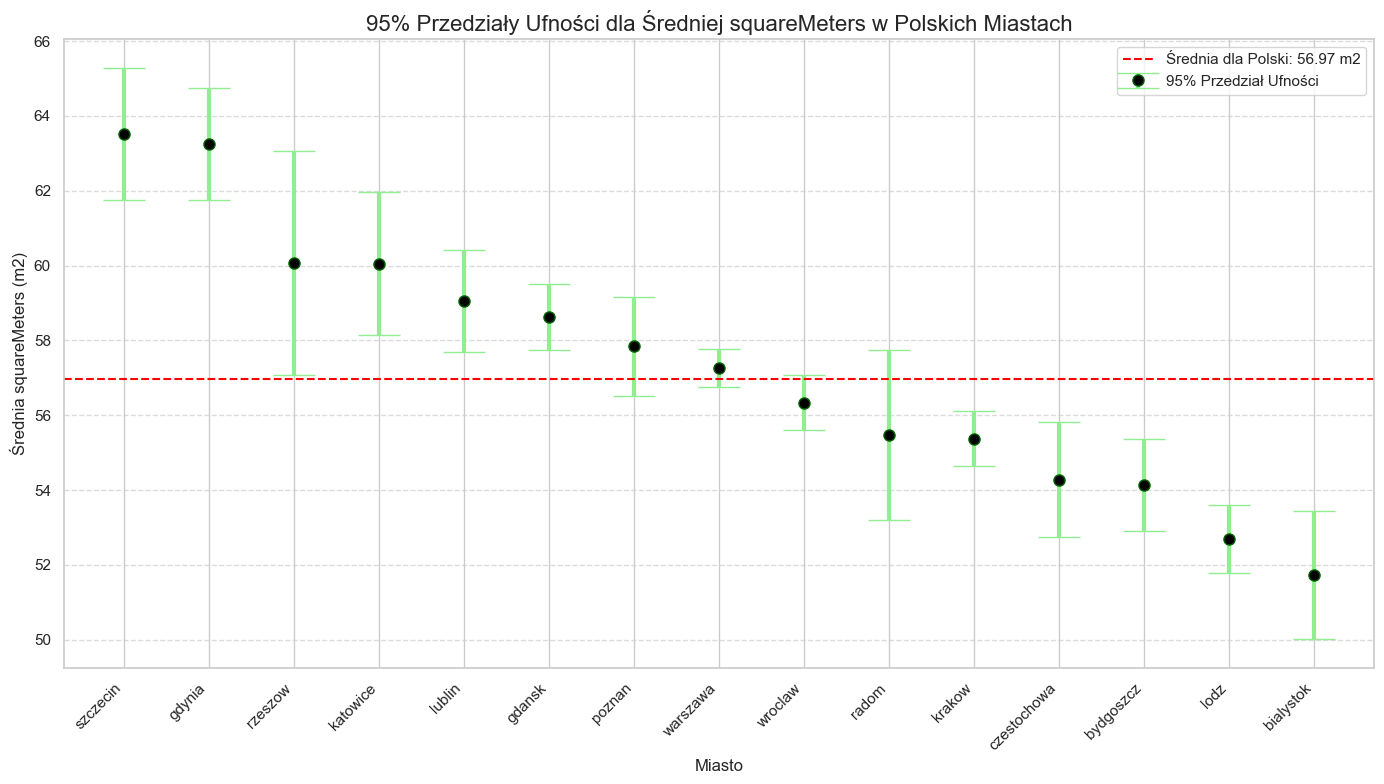

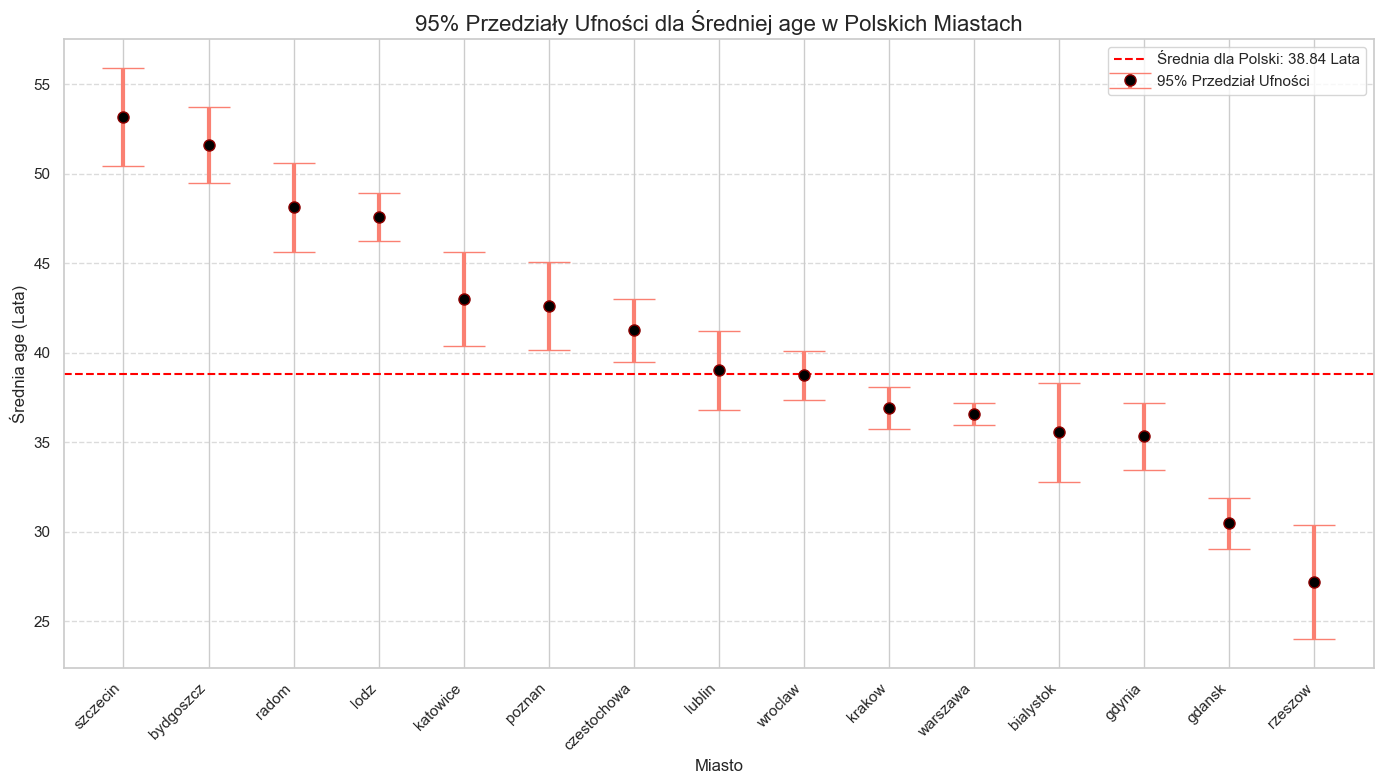

In [ ]:
# -----------------------------
# 4. Lokalny Przedział Ufności dla Średniej Ceny za M2, powierzchnia i wiek w CAŁEJ POLSCE
# -----------------------------

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# Używamy 2025 roku jako punktu odniesienia
CURRENT_YEAR = 2025 

# Tworzenie serii danych 'age' (wiek)
age_series = CURRENT_YEAR - df['buildYear']

# Dodanie serii jako nowej kolumny 'age' do ramki danych df
df['age'] = age_series

# Ustawienie estetyki wykresów
sns.set_theme(style="whitegrid")
confidence_level = 0.95

# ----------------------------------------------------------------------
# 1. FUNKCJA POMOCNICZA DO OBLICZANIA CI
# ----------------------------------------------------------------------

def calculate_ci(group, confidence_level=0.95):
    """Oblicza średnią, błąd standardowy i granice CI dla danej kolumny danych."""
    n = len(group)
    mean = group.mean()
    std = group.std()
    
    # Warunek minimalnej próby dla stabilności statystycznej
    if n < 30 or std == 0:
        return pd.Series({'mean': mean, 'ci_lower': np.nan, 'ci_upper': np.nan, 'moe': np.nan})
        
    std_err = std / np.sqrt(n)
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * std_err
    
    return pd.Series({
        'mean': mean,
        'ci_lower': mean - margin_of_error,
        'ci_upper': mean + margin_of_error,
        'moe': margin_of_error # Margines błędu
    })

# ----------------------------------------------------------------------
# 2. FUNKCJA DO GENEROWANIA WYKRESÓW DLA DOWOLNEJ ZMIENNEJ
# ----------------------------------------------------------------------

def plot_ci_by_city(df, column_name, unit_label):
    """Oblicza CI i generuje wykres errorbar dla danej kolumny, grupując po mieście."""
    
    # Obliczanie CI dla miast
    ci_by_city = df.groupby('city')[column_name].apply(calculate_ci).unstack()
    ci_by_city = ci_by_city.sort_values(by='mean', ascending=False).dropna(subset=['mean'])
    
    # Obliczanie średniej dla całej Polski (do linii odniesienia)
    overall_mean = df[column_name].mean()

    if ci_by_city.empty:
        print(f"Brak wystarczających danych do wygenerowania wykresu dla kolumny: {column_name}")
        return

    plt.figure(figsize=(14, 8))
    
    yerr_data = ci_by_city['moe'] 

    plt.errorbar(
        x=ci_by_city.index, 
        y=ci_by_city['mean'], 
        yerr=yerr_data, 
        fmt='o', 
        capsize=15, 
        color='darkgreen' if unit_label == 'm2' else ('darkred' if unit_label == 'Lata' else 'darkblue'),
        ecolor='lightgreen' if unit_label == 'm2' else ('salmon' if unit_label == 'Lata' else 'skyblue'),
        elinewidth=3,
        markerfacecolor='black',
        markersize=8,
        label='95% Przedział Ufności'
    )

    # Linia odniesienia
    plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Średnia dla Polski: {overall_mean:.2f} {unit_label}')

    plt.title(f'95% Przedziały Ufności dla Średniej {column_name} w Polskich Miastach', fontsize=16)
    plt.xlabel('Miasto', fontsize=12)
    plt.ylabel(f'Średnia {column_name} ({unit_label})', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ----------------------------------------------------------------------
# 3. GENEROWANIE WYKRESÓW
# ----------------------------------------------------------------------

print("--- Wizualizacja CI dla Miast ---")

# WYKRES 1: Cena za m2
plot_ci_by_city(df, 'pricePerM2', 'PLN/m2')
# 

# WYKRES 2: Powierzchnia
plot_ci_by_city(df, 'squareMeters', 'm2')
# 

# WYKRES 3: Wiek Budynku
# Zakładamy, że kolumna 'age' została wcześniej obliczona jako 2025 - buildYear
if 'age' in df.columns:
    plot_ci_by_city(df, 'age', 'Lata')
    # 
else:
    print("\n⚠️ OSTRZEŻENIE: Kolumna 'age' nie została znaleziona w ramce danych. Proszę ją utworzyć (np. 2025 - buildYear).")



Przedział ufności to zakres wartości, obliczony na podstawie danych z próby, który z określonym poziomem ufności (w tym przypadku 95%) zawiera rzeczywisty, nieznany parametr populacji (np. średnią μ lub proporcję p). Na przykład: 95% przedział ufności dla średniej ceny za metr kwadratowy oznacza, że istnieje 95% prawdopodobieństwo, iż faktyczna średnia cena w całej populacji ofert mieści się w wyznaczonym zakresie.

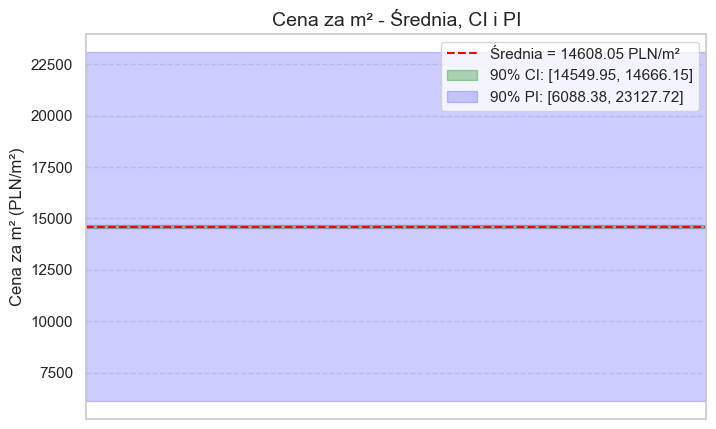

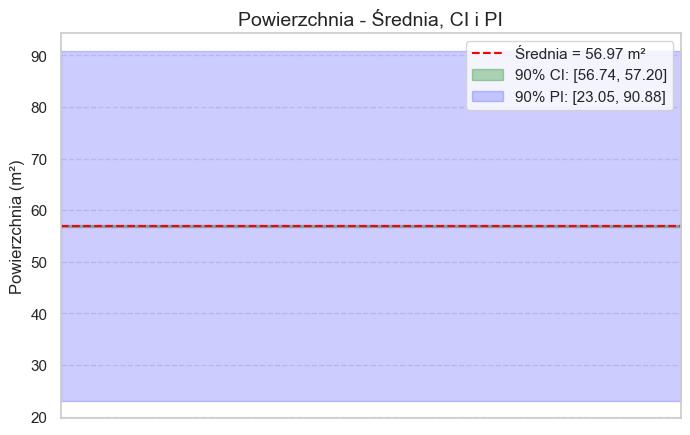

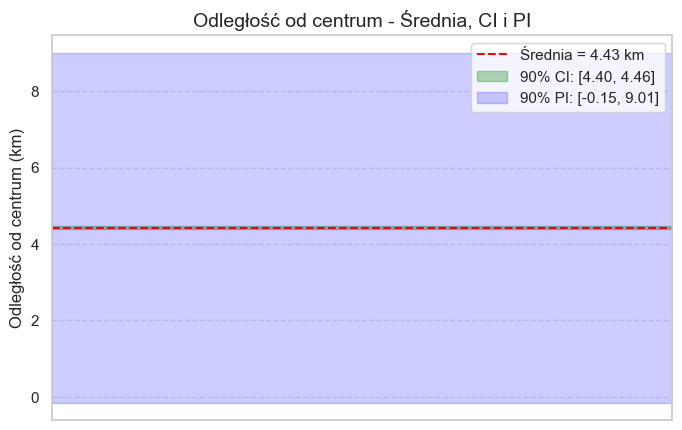

In [ ]:
# -----------------------------
# 5. Globalny Przedział Ufności i Przedział Predykcji dla Średniej Ceny za M2, powierzchnia i odległość od centrum
# -----------------------------
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Funkcja do rysowania wykresu z CI i PI
def plot_ci_pi(data, variable_name, unit_label, confidence_level=0.9):
    data = data.dropna()
    n = len(data)
    mean = data.mean()
    std = data.std(ddof=1)
    
    alpha = 1 - confidence_level
    t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
    
    # Przedział ufności dla średniej
    ci_lower = mean - t_crit * std / np.sqrt(n)
    ci_upper = mean + t_crit * std / np.sqrt(n)
    
    # Przedział predykcji dla pojedynczej obserwacji
    pi_lower = mean - t_crit * std * np.sqrt(1 + 1/n)
    pi_upper = mean + t_crit * std * np.sqrt(1 + 1/n)
    
    # Wykres
    plt.figure(figsize=(8, 5))
    plt.axhline(mean, color='red', linestyle='--', label=f'Średnia = {mean:.2f} {unit_label}')
    plt.fill_between([0,1], ci_lower, ci_upper, color='green', alpha=0.3, label=f'90% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
    plt.fill_between([0,1], pi_lower, pi_upper, color='blue', alpha=0.2, label=f'90% PI: [{pi_lower:.2f}, {pi_upper:.2f}]')
    
    plt.title(f'{variable_name} - Średnia, CI i PI', fontsize=14)
    plt.xlim(0, 1)
    plt.ylabel(f'{variable_name} ({unit_label})')
    plt.xticks([])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Wywołanie funkcji dla trzech zmiennych
plot_ci_pi(df['pricePerM2'], 'Cena za m²', 'PLN/m²')
plot_ci_pi(df['squareMeters'], 'Powierzchnia', 'm²')
plot_ci_pi(df['centreDistance'], 'Odległość od centrum', 'km')


Analiza zmiennych pricePerM2, squareMeters i centreDistance pokazuje, że średnie wartości tych cech są dobrze oszacowane, o czym świadczą wąskie przedziały ufności (CI) obejmujące 90% możliwych średnich w populacji. Jednocześnie szerokie przedziały predykcji (PI) wskazują, że pojedyncze mieszkania mogą znacząco odbiegać od średniej — ceny za m², powierzchnie i odległości od centrum wykazują dużą zmienność wśród poszczególnych nieruchomości. Oznacza to, że choć średnie wartości są reprezentatywne, rzeczywiste dane poszczególnych mieszkań mogą różnić się od nich w znacznym stopniu.


ANALIZA: pricePerM2 ~ city

📊 Wyniki Welch ANOVA:
  Source  ddof1      ddof2          F  p-unc     np2
0   city     14  2822.6942  3517.3094    0.0  0.5665

🧠 Interpretacja:
✔ Istnieją **istotne statystycznie różnice** średniej zmiennej 'pricePerM2' pomiędzy grupami zmiennej 'city' (p = 0.0000 < 0.05).

📈 Statystyki opisowe:
                 mean    median      std  count
city                                           
bialystok    10089.06   9884.49  1837.51    231
bydgoszcz     8194.03   7987.22  1735.80    937
czestochowa   7034.63   6888.89  1402.83    385
gdansk       15402.31  14053.57  4373.61   1986
gdynia       14020.05  12652.36  4656.85    828
katowice      9038.26   8461.54  2461.50    593
krakow       17135.48  16353.48  3788.69   3245
lodz          8536.00   8316.67  1653.07   1691
lublin       10060.79   9890.25  1780.42    574
poznan       11472.10  11018.52  2210.07    793
radom         6929.92   6699.51  1220.21    195
rzeszow      10803.55  10811.15  1882.11    163


/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_28194/2637817293.py:68: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


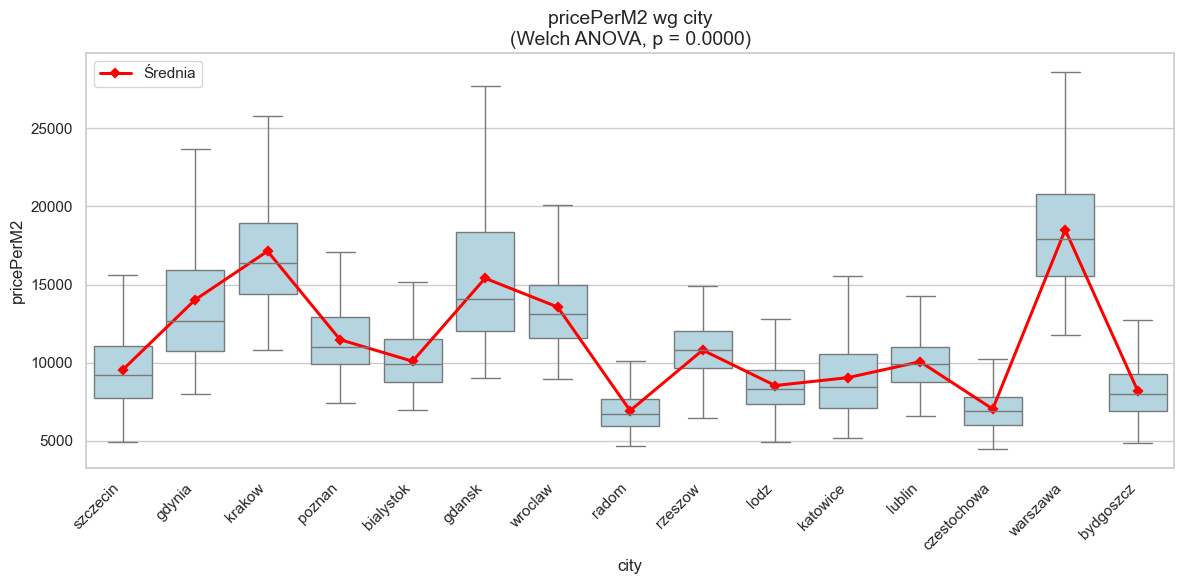


ANALIZA: pricePerM2 ~ type


/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_28194/2637817293.py:68: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(



📊 Wyniki Welch ANOVA:
  Source  ddof1      ddof2          F  p-unc    np2
0   type      2  6707.6453  1295.1974    0.0  0.107

🧠 Interpretacja:
✔ Istnieją **istotne statystycznie różnice** średniej zmiennej 'pricePerM2' pomiędzy grupami zmiennej 'type' (p = 0.0000 < 0.05).

📈 Statystyki opisowe:
                       mean    median      std  count
type                                                 
apartmentBuilding  17954.37  17900.00  5002.06   4268
blockOfFlats       13602.71  13472.22  4458.65  13735
tenement           14472.62  13625.36  6217.90   3498


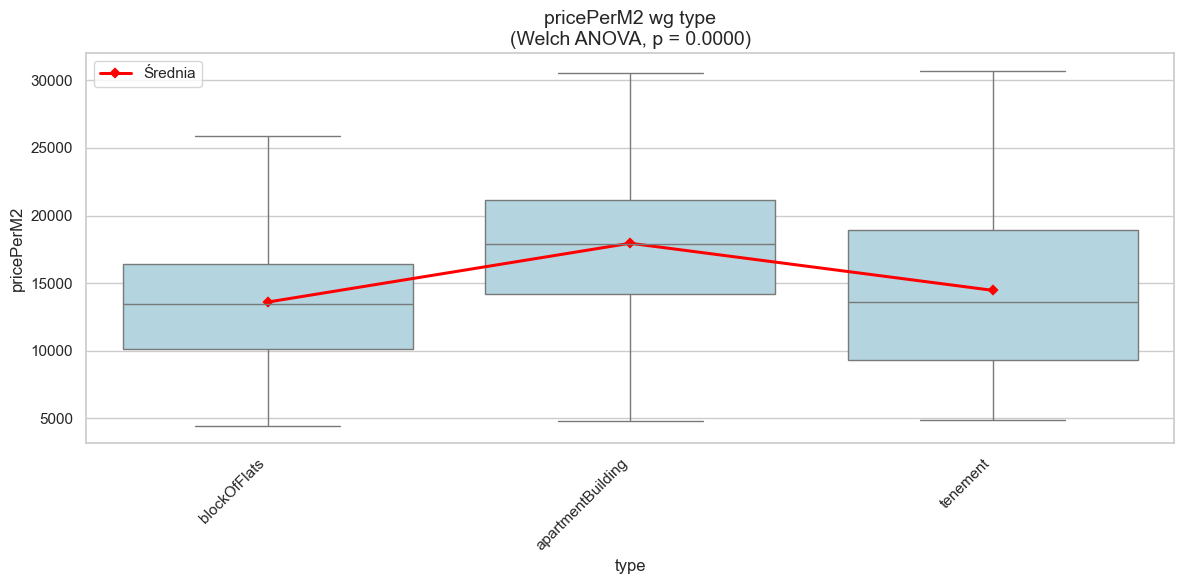


ANALIZA: pricePerM2 ~ floorCount

📊 Wyniki Welch ANOVA:
       Source  ddof1   ddof2         F  p-unc    np2
0  floorCount     28  77.192  158.5818    0.0  0.126

🧠 Interpretacja:
✔ Istnieją **istotne statystycznie różnice** średniej zmiennej 'pricePerM2' pomiędzy grupami zmiennej 'floorCount' (p = 0.0000 < 0.05).

📈 Statystyki opisowe:
                mean    median      std  count
floorCount                                    
1           12724.19  12370.44  4682.35    421
2           13832.85  13424.66  4971.22   1517
3           13837.24  13438.61  4872.33   4034
4           13211.65  12744.89  4924.71   6562
5           16788.30  16441.67  5105.99   2046
6           17856.87  17771.01  4965.40   1327
7           17814.82  17625.23  4292.32    867
8           17381.94  16923.08  4806.57    651
9           17148.21  16843.09  4511.82    279
10          13880.73  14118.06  4344.06   2126
11          12759.57  11453.27  5059.39    656
12          16194.17  15484.38  4242.86    260
13

/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_28194/2637817293.py:68: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


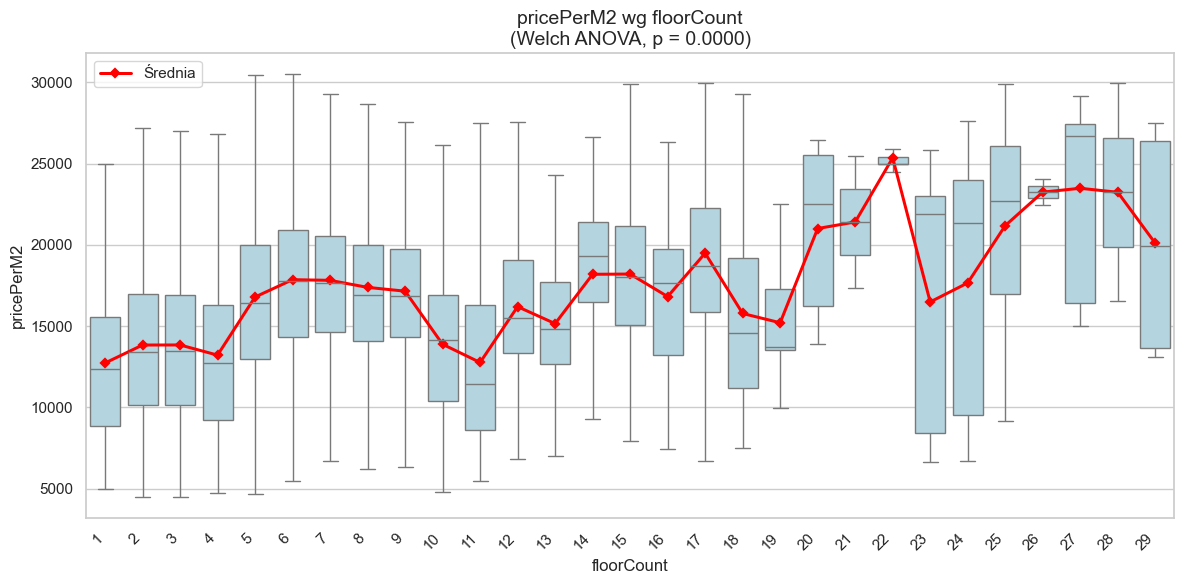

In [84]:
# ===============================
# 6. WELCH ANOVA + INTERPRETACJA + WIZUALIZACJA (cena za m2 w podziale na miasto, typ budynku, licbę pięter)

# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

sns.set_theme(style="whitegrid")

def welch_anova_with_visualization(df, dv, group, alpha=0.05):
    print("\n" + "="*70)
    print(f"ANALIZA: {dv} ~ {group}")
    print("="*70)

    # --- 1. Czyszczenie danych ---
    data = df[[dv, group]].dropna()

    if data.empty:
        print("❌ Brak danych po usunięciu braków (NaN).")
        return

    if data[group].nunique() < 2:
        print("❌ Zmienna grupująca ma mniej niż 2 grupy – ANOVA niemożliwa.")
        return

    # --- 2. Welch ANOVA ---
    anova = pg.welch_anova(dv=dv, between=group, data=data)
    p_value = anova["p-unc"].iloc[0]

    print("\n📊 Wyniki Welch ANOVA:")
    print(anova.round(4))

    # --- 3. Interpretacja ---
    print("\n🧠 Interpretacja:")
    if p_value < alpha:
        print(
            f"✔ Istnieją **istotne statystycznie różnice** średniej zmiennej "
            f"'{dv}' pomiędzy grupami zmiennej '{group}' "
            f"(p = {p_value:.4f} < {alpha})."
        )
    else:
        print(
            f"✖ Brak podstaw do stwierdzenia istotnych różnic "
            f"średniej '{dv}' pomiędzy grupami '{group}' "
            f"(p = {p_value:.4f} ≥ {alpha})."
        )

    # --- 4. Statystyki opisowe ---
    desc = data.groupby(group)[dv].agg(['mean', 'median', 'std', 'count']).round(2)
    print("\n📈 Statystyki opisowe:")
    print(desc)

    # --- 5. Wizualizacja ---
    plt.figure(figsize=(12, 6))

    sns.boxplot(
        data=data,
        x=group,
        y=dv,
        showfliers=False,
        color="lightblue"
    )

    sns.pointplot(
        data=data,
        x=group,
        y=dv,
        estimator=np.mean,
        color="red",
        markers="D",
        scale=0.8,
        errorbar=None,
        label="Średnia"
    )

    plt.title(f"{dv} wg {group}\n(Welch ANOVA, p = {p_value:.4f})", fontsize=14)
    plt.xlabel(group)
    plt.ylabel(dv)
    plt.xticks(rotation=45, ha="right")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ===============================
# WYWOŁANIA
# ===============================

welch_anova_with_visualization(df, 'pricePerM2', 'city')
welch_anova_with_visualization(df, 'pricePerM2', 'type')
welch_anova_with_visualization(df, 'pricePerM2', 'floorCount')


Wyniki testów Welch ANOVA wskazują, że średnia cena za m² istotnie różni się między analizowanymi grupami.
Miasto: Zaobserwowano bardzo duże i istotne statystycznie różnice cen za m² między miastami (p < 0,05), co potwierdza silne zróżnicowanie regionalne rynku nieruchomości.
Typ budynku: Rodzaj zabudowy istotnie wpływa na cenę za m² – najwyższe ceny występują w budynkach apartamentowych, a najniższe w blokach (p < 0,05).
Liczba kondygnacji (floorCount): Cena za m² różni się istotnie w zależności od wysokości budynku (p < 0,05), przy czym wyższe budynki są przeciętnie droższe.
Wyniki potwierdzają, że lokalizacja oraz cechy budynku są kluczowymi determinantami cen mieszkań.

## 📊 Przedziały Ufności (95%) dla Proporcji Cech Binarnych (Metoda Walda)
        Zmienna     N  Proporcja (p̂)  CI Dolne  CI Górne     Metoda
hasParkingSpace 21501          0.2774    0.2696    0.2853 Wald (95%)
     hasBalcony 21501          0.5858    0.5771    0.5944 Wald (95%)
    hasElevator 21501          0.5001    0.4913    0.5089 Wald (95%)
    hasSecurity 21501          0.1238    0.1180    0.1295 Wald (95%)
 hasStorageRoom 21501          0.4355    0.4268    0.4442 Wald (95%)


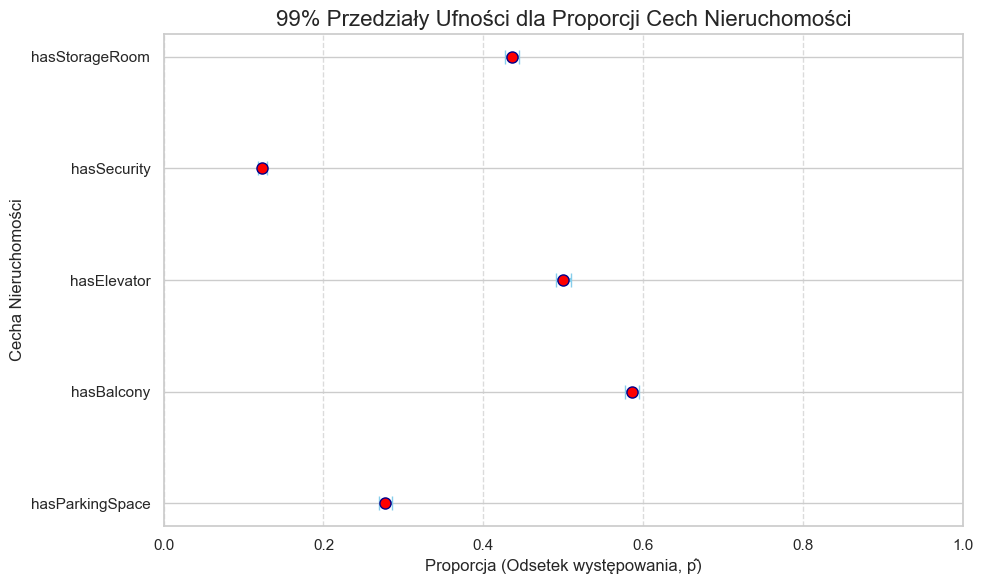

In [ ]:
# -----------------------------
# 7. Przedziały Ufności (95%) dla Proporcji Cech Binarnych (Metoda Walda)
# -----------------------------


import pandas as pd
import numpy as np
import scipy.stats as stats

# Lista zmiennych binarnych do analizy
BINARY_VARS = ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']
CONFIDENCE_LEVEL = 0.99
ALPHA = 1 - CONFIDENCE_LEVEL

# Z-score dla 95% CI (ok. 1.96)
Z_SCORE = stats.norm.ppf(1 - ALPHA / 2)

results = []

for var in BINARY_VARS:
    data = df[var].copy()
    
    # Krok 1: Standaryzacja danych (mapowanie 'yes'/'no' na 1/0)
    if data.dtype == 'object' or data.dtype.name == 'category':
        data = data.str.lower().map({'yes': 1, 'no': 0})

    # Krok 2: Czyszczenie danych
    data = data.dropna()
    data = data.astype(int) 
    
    n = len(data)
    
    if n < 30: # Zabezpieczenie przed małą próbą
        results.append({
            'Zmienna': var, 'N': n, 'Proporcja (p̂)': np.nan, 'CI Dolne': np.nan, 'CI Górne': np.nan, 'Metoda': 'Mała Próba'
        })
        continue
        
    p_hat = data.mean() # Średnia to proporcja wystąpienia cechy (1)
    
    # Krok 3: Obliczenie CI
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    moe = Z_SCORE * se
    
    ci_lower = p_hat - moe
    ci_upper = p_hat + moe
    
    # Ograniczenie granic CI do zakresu [0, 1]
    ci_lower = max(0, ci_lower)
    ci_upper = min(1, ci_upper)
    
    results.append({
        'Zmienna': var,
        'N': n,
        'Proporcja (p̂)': p_hat,
        'CI Dolne': ci_lower,
        'CI Górne': ci_upper,
        'Metoda': 'Wald (95%)'
    })

# Konwersja wyników do DataFrame dla czytelnego wyświetlenia
results_df = pd.DataFrame(results)

print("## 📊 Przedziały Ufności (95%) dla Proporcji Cech Binarnych (Metoda Walda)")
print(results_df.to_string(index=False, float_format="%.4f"))

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienie estetyki wykresów
sns.set_theme(style="whitegrid")

# --- KROK 1: PONOWNE OBLICZENIE PRZEDZIAŁÓW UFNOŚCI ---

BINARY_VARS = ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']
CONFIDENCE_LEVEL = 0.99
ALPHA = 1 - CONFIDENCE_LEVEL
Z_SCORE = stats.norm.ppf(1 - ALPHA / 2)

results = []

for var in BINARY_VARS:
    data = df[var].copy()
    
    # Standaryzacja danych do 0 i 1
    if data.dtype == 'object' or data.dtype.name == 'category':
        data = data.str.lower().map({'yes': 1, 'no': 0})

    data = data.dropna()
    
    n = len(data)
    if n < 30: continue
        
    p_hat = data.mean() 
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    moe = Z_SCORE * se # Margines Błędu
    
    ci_lower = max(0, p_hat - moe)
    ci_upper = min(1, p_hat + moe)
    
    results.append({
        'Zmienna': var,
        'Proporcja (p̂)': p_hat,
        'CI Dolne': ci_lower,
        'CI Górne': ci_upper,
        'ME': moe # Margines Błędu
    })

results_df = pd.DataFrame(results)

# --- KROK 2: WIZUALIZACJA ---

if results_df.empty:
    print("Brak wystarczających danych do wygenerowania wykresu przedziałów ufności (N < 30 lub brak danych).")
else:
    # Przygotowanie danych błędu: ME to długość ramienia błędu
    results_df['yerr'] = results_df['ME'] 

    plt.figure(figsize=(10, 6))

    plt.errorbar(
        x=results_df['Proporcja (p̂)'],
        y=results_df['Zmienna'],
        xerr=results_df['yerr'], # Poziome ramiona błędu
        fmt='o', # Marker w formie kropki
        capsize=5, 
        color='darkblue',
        ecolor='skyblue',
        elinewidth=3,
        markerfacecolor='red',
        markersize=8
    )

    plt.title('99% Przedziały Ufności dla Proporcji Cech Nieruchomości', fontsize=16)
    plt.xlabel('Proporcja (Odsetek występowania, p̂)', fontsize=12)
    plt.ylabel('Cecha Nieruchomości', fontsize=12)
    plt.xlim(0, 1) # Proporcje mieszczą się w zakresie [0, 1]
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Wyznaczone zostały przedziały ufności dla proporcji cech nieruchomości metodą Walda, standaryzując dane i weryfikując liczebność próby, co pozwala na precyzyjne oszacowanie struktury rynku. Wyniki prezentowane są na wykresie punktowym, gdzie kropka reprezentuje szacowaną proporcję występowania danej cechy (np. windy lub balkonu), a pionowe linie wyznaczają margines błędu, w którym z 99% prawdopodobieństwem znajduje się faktyczna wartość rynkowa. Interpretacja opiera się na szerokości tych przedziałów – im są one węższe, tym większa precyzja wynikająca z dużej liczby danych (N=21501),

--- 📏 Klasyfikacja Mieszkań na 3 Grupy (Tercyle) ---
Liczba wszystkich obserwacji (n): 21501
--------------------------------------------------
## 📐 Granice Podziału (Powierzchnia w m²)
Minimum (min): 25.00 m²
**1/3 Kwantyl (Q1/3): 46.51 m²**
**2/3 Kwantyl (Q2/3): 61.18 m²**
Maksimum (max): 150.00 m²
--------------------------------------------------
## 🏷️ Klasyfikacja Mieszkań na podstawie Powierzchni (squareMeters):
* **Małe (Small):** Powierzchnia do 46.51 m²
* **Średnie (Medium):** Powierzchnia od 46.51 m² do 61.18 m²
* **Duże (Large):** Powierzchnia powyżej 61.18 m²

## 🔢 Liczność Mieszkań w Utworzonych Grupach:
size_group
Małe (Small)        7168
Duże (Large)        7167
Średnie (Medium)    7166
Name: count, dtype: int64
--------------------------------------------------
## 💰 Wyniki Przedziałów Ufności (PLN/m2) dla Grup Wielkościowych
                      mean  ci_lower  ci_upper
size_group                                    
Małe (Small)      15647.41  15526.63  15768.19
Średni

/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_28194/2168735197.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ci_by_size = df.groupby('size_group')['pricePerM2'].apply(calculate_ci_group).unstack()


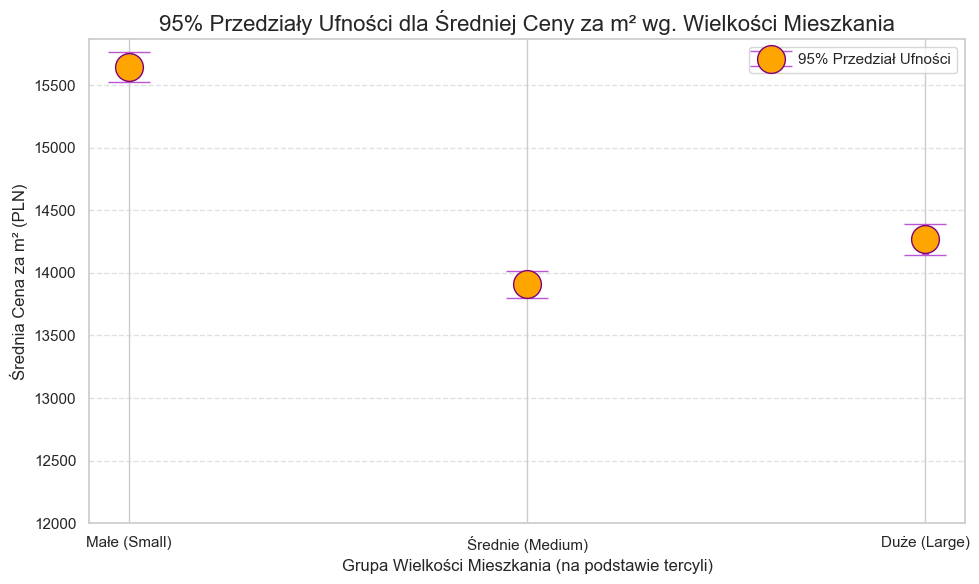

In [ ]:
# -----------------------------
# 8. Analiza CI i wizualizacja dla grup wielkościowych pod wzgledem powierzhni (małe, średnie, duże)
# -----------------------------------------------------

# Ustawienie estetyki wykresów
sns.set_theme(style="whitegrid")
confidence_level = 0.95

#FUNKCJA POMOCNICZA DO OBLICZANIA PRZEDZIAŁÓW UFNOŚCI (CI)


def calculate_ci_group(group, confidence_level=0.95):
    """Oblicza średnią, błąd standardowy i granice CI (95%) dla podanej serii danych."""
    n = len(group)
    mean = group.mean()
    std = group.std()
    
    # Obliczanie błędu standardowego średniej
    std_err = std / np.sqrt(n)
    
    # Wartość Z dla danego poziomu ufności
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    
    margin_of_error = z_score * std_err
    
    return pd.Series({
        'mean': mean,
        'ci_lower': mean - margin_of_error,
        'ci_upper': mean + margin_of_error,
        'moe': margin_of_error
    })


# KLASYFIKACJA I WYZNACZENIE GRANIC PODZIAŁU (TERCYLE)


print("--- 📏 Klasyfikacja Mieszkań na 3 Grupy (Tercyle) ---")

# a) Klasyfikacja
df['size_group'] = pd.qcut(
    df['squareMeters'],
    q=3,
    labels=['Małe (Small)', 'Średnie (Medium)', 'Duże (Large)'],
    duplicates='drop'
)

# b) Obliczenie i wyświetlenie granic
tercile_limits = df['squareMeters'].quantile([1/3, 2/3])
lower_limit = df['squareMeters'].min()
upper_limit = df['squareMeters'].max()
q1_3 = tercile_limits.iloc[0]
q2_3 = tercile_limits.iloc[1]

print(f"Liczba wszystkich obserwacji (n): {len(df)}")
print("-" * 50)

print("## 📐 Granice Podziału (Powierzchnia w m²)")
print(f"Minimum (min): {lower_limit:.2f} m²")
print(f"**1/3 Kwantyl (Q1/3): {q1_3:.2f} m²**")
print(f"**2/3 Kwantyl (Q2/3): {q2_3:.2f} m²**")
print(f"Maksimum (max): {upper_limit:.2f} m²")
print("-" * 50)

print("## 🏷️ Klasyfikacja Mieszkań na podstawie Powierzchni (squareMeters):")
print(f"* **Małe (Small):** Powierzchnia do {q1_3:.2f} m²")
print(f"* **Średnie (Medium):** Powierzchnia od {q1_3:.2f} m² do {q2_3:.2f} m²")
print(f"* **Duże (Large):** Powierzchnia powyżej {q2_3:.2f} m²")

print("\n## 🔢 Liczność Mieszkań w Utworzonych Grupach:")
print(df['size_group'].value_counts())
print("-" * 50)

# -----------------------------------------------------

# Zastosowanie funkcji do zgrupowanych danych (cena za m2)
ci_by_size = df.groupby('size_group')['pricePerM2'].apply(calculate_ci_group).unstack()

print("## 💰 Wyniki Przedziałów Ufności (PLN/m2) dla Grup Wielkościowych")
print(ci_by_size[['mean', 'ci_lower', 'ci_upper']].apply(lambda x: x.round(2)))

plt.figure(figsize=(10, 6))

# Margines błędu (MoE) dla wykresu errorbar
yerr_data = ci_by_size['moe'] 

# Tworzenie wykresu słupkowego (lub punktowego z errorbar)
plt.errorbar(
    x=ci_by_size.index, 
    y=ci_by_size['mean'],
    yerr=yerr_data,
    fmt='o', 
    capsize=15,
    color='purple',
    ecolor='mediumorchid',
    elinewidth=5,
    markerfacecolor='orange',
    markersize=20,
    label='95% Przedział Ufności'
)

# NOWA LINIA: Ustawienie skali osi Y od 5000 PLN
plt.ylim(12000, None) 

plt.title('95% Przedziały Ufności dla Średniej Ceny za m² wg. Wielkości Mieszkania', fontsize=16)
plt.xlabel('Grupa Wielkości Mieszkania (na podstawie tercyli)', fontsize=12)
plt.ylabel('Średnia Cena za m² (PLN)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Poniższy tag wygeneruje wizualizację

Przeprowadzona zastała analiza porównawcza średniej ceny za metr kwadratowy (pricePerM2) na polskim rynku nieruchomości, dzieląc mieszkania na trzy grupy: Małe, Średnie i Duże, na podstawie tercyli powierzchni. Stworzyliśmy te grupy, aby ocenić, czy cena jednostkowa różni się istotnie statystycznie w zależności od wielkości lokalu. Otrzymany wykres z 95% przedziałami ufności (CI) wizualnie potwierdza rynkową zasadę: najmniejsze mieszkania mają najwyszą cenę za m², ponieważ grupa "Małe" wykazuje najwyższą średnią.

--- 🔬 Analiza Istotności Statystycznej Cen za m² (Test Post-Hoc Tukeya) ---


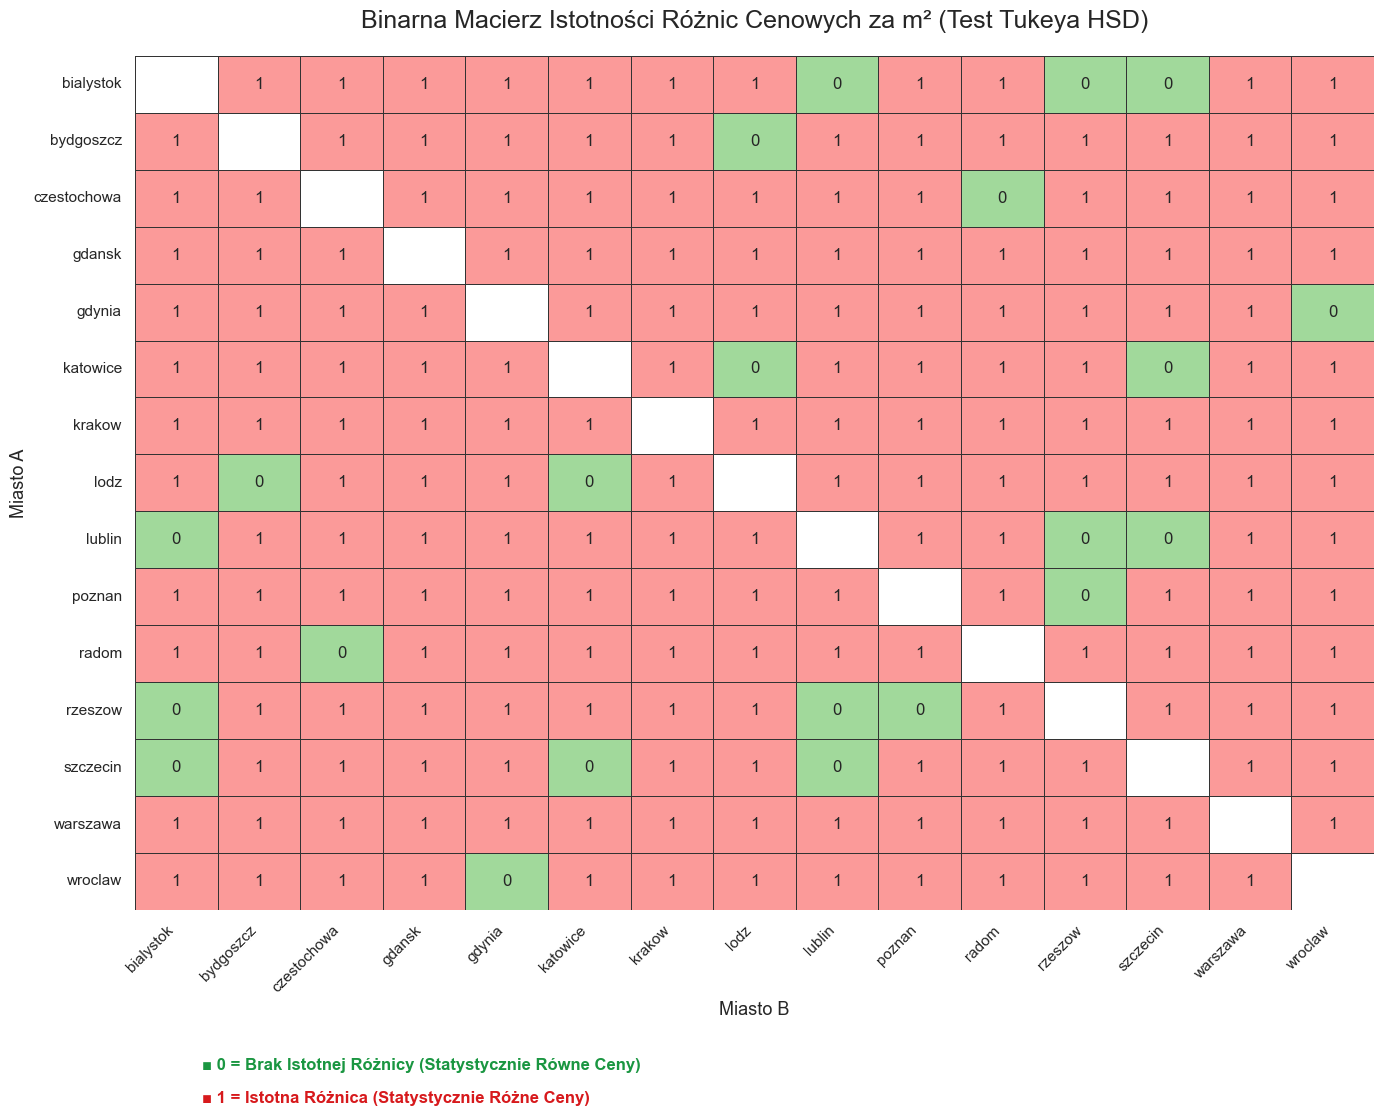


Top 5 najbardziej różniących się par miast (największy 'meandiff'):
         group1    group2    meandiff  reject
97        radom  warszawa  11574.0418    True
37  czestochowa  warszawa  11469.3368    True
25    bydgoszcz  warszawa  10309.9312    True
30  czestochowa    krakow  10100.8559    True
82         lodz  warszawa   9967.9618    True


In [ ]:
# -----------------------------
# 9. Analiza Istotności Statystycznej Różnic w Średniej Cenie za Metr Kwadratowy Pomiędzy Największymi Miastami w Polsce (Test Post-Hoc Tukeya)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Przygotowanie danych i filtracja
# Zakładamy, że 'df' to Twój główny DataFrame z kolumnami 'city' i 'price_per_m2'
CITIES_ASCII = [
    'warszawa', 'krakow', 'gdansk', 'gdynia', 'wroclaw', 'poznan', 
    'rzeszow', 'bialystok', 'lublin', 'szczecin', 'katowice', 'lodz', 
    'bydgoszcz', 'czestochowa', 'radom'
]
ALPHA = 0.05 

# Filtrowanie tylko wybranych miast
df_cities = df[df['city'].isin(CITIES_ASCII)].copy()

print("--- 🔬 Analiza Istotności Statystycznej Cen za m² (Test Post-Hoc Tukeya) ---")

# 2. Wykonanie Testu Tukeya HSD
# Test sprawdza każdą możliwą parę miast
tukey = pairwise_tukeyhsd(endog=df_cities['pricePerM2'], 
                          groups=df_cities['city'], 
                          alpha=ALPHA)

# 3. Konwersja wyników na DataFrame (Rozwiązanie błędu KeyError)
# Pobieramy surowe dane z obiektu podsumowania (summary)
tukey_data = tukey.summary().data
results_df = pd.DataFrame(tukey_data[1:], columns=tukey_data[0])

# Upewnienie się, że typy danych są poprawne
results_df['reject'] = results_df['reject'].astype(bool)
results_df['group1'] = results_df['group1'].astype(str)
results_df['group2'] = results_df['group2'].astype(str)

# --- TWORZENIE MACIERZY BINARNEJ ---

# Pobranie unikalnych nazw miast z wyników testu
unique_cities = sorted(pd.concat([results_df['group1'], results_df['group2']]).unique().tolist())
significance_matrix = pd.DataFrame(np.nan, index=unique_cities, columns=unique_cities)

# Wypełnianie macierzy wartościami binarnymi (1 = istotna różnica, 0 = brak różnicy)
for _, row in results_df.iterrows():
    val = 1 if row['reject'] else 0
    significance_matrix.loc[row['group1'], row['group2']] = val
    significance_matrix.loc[row['group2'], row['group1']] = val

# --- WIZUALIZACJA ---

plt.figure(figsize=(14, 11))
sns.set_theme(style="white")

# Rysowanie mapy ciepła
sns.heatmap(
    significance_matrix,
    annot=True,
    cmap=['#a1d99b', '#fb9a99'], # Jasnozielony dla 0, jasnoczerwony dla 1
    fmt=".0f",
    linewidths=.5,
    linecolor='#333333',
    cbar=False
)

# Estetyka wykresu
plt.title('Binarna Macierz Istotności Różnic Cenowych za m² (Test Tukeya HSD)', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Miasto B', fontsize=13)
plt.ylabel('Miasto A', fontsize=13)

# Dodanie legendy tekstowej
plt.figtext(0.15, 0.02, '■ 0 = Brak Istotnej Różnicy (Statystycznie Równe Ceny)', color='#1a9641', fontsize=12, fontweight='bold')
plt.figtext(0.15, -0.01, '■ 1 = Istotna Różnica (Statystycznie Różne Ceny)', color='#d7191c', fontsize=12, fontweight='bold')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

# Opcjonalnie: Wyświetlenie tabeli z największymi różnicami
print("\nTop 5 najbardziej różniących się par miast (największy 'meandiff'):")
print(results_df.sort_values(by='meandiff', ascending=False).head(5)[['group1', 'group2', 'meandiff', 'reject']])

Powyższa macierz wskazuje, między którymi miastami różnice w średniej cenie za m² są istotne statystycznie (1), a które rynki są do siebie zbliżone (0). Na jej podstawie można stwierdzić, że miastami o statystycznie tożsamych poziomach cen są m.in. Gdynia i Wrocław oraz Katowice i Łódź.

Oznacza to, że choć ich średnie ceny mogą się nieznacznie różnić, z punktu widzenia statystycznego różnice te są pomijalne i miasta te należą do tej samej klasy cenowej. Z kolei pola oznaczone jedynką (kolor czerwony) wyznaczają pary miast o wyraźnie odmiennej charakterystyce rynkowej, której nie da się wyjaśnić błędem losowym.

--- 📊 Porównanie Regionalne Ceny za m² (N_Zachód=10748, N_Wschód=10753) ---
Średnia ZACHÓD: 14135.94 PLN/m²
Średnia WSCHÓD: 15079.94 PLN/m²
----------------------------------------
Statystyka t: -13.419
P-value: 6.96252e-41
Wniosek: Różnica średniej ceny za m² między Wschodem a Zachodem jest **ISTOTNA STATYSTYCZNIE**.


/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_28194/2499376521.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


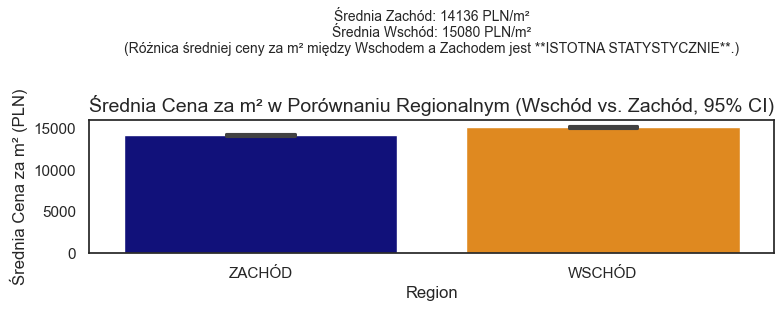

In [ ]:
# -----------------------------
# 10. Analiza Różnic Cenowych: Porównanie Średniej Ceny za m² Między Regionem Wschodnim a Zachodnim Polski (Test t Welcha)
# -----------------------------------------------------


# --- Ustawienia ---
TARGET_VAR = 'pricePerM2'
ALPHA = 0.05

# --- 1. Definicja Regionów Wschód/Zachód (Używając wszystkich podanych miast) ---
# Uwaga: Regiony zostały zdefiniowane w listach, ale mapowanie musi użyć df.
WEST_CITIES = ['gdansk', 'gdynia', 'szczecin', 'wroclaw', 'poznan', 'katowice', 'krakow', 'czestochowa']
EAST_CITIES = ['lublin', 'bialystok', 'rzeszow', 'radom', 'lodz', 'warszawa', 'bydgoszcz']

# 2. Przygotowanie i Mapowanie Danych
df['city_normalized'] = df['city'].str.lower()

def map_region_ew(city):
    if city in WEST_CITIES:
        return 'ZACHÓD'
    elif city in EAST_CITIES:
        return 'WSCHÓD'
    else:
        # Miasta, których nie ma na liście, są oznaczane jako INNE
        return 'INNE'

df['Region_EW'] = df['city_normalized'].apply(map_region_ew)

# Filtrowanie tylko do regionów porównawczych i czyszczenie braków
df_regional_ew = df[df['Region_EW'].isin(['WSCHÓD', 'ZACHÓD'])].dropna(subset=[TARGET_VAR, 'Region_EW']).copy()

# Wyodrębnienie POPRAWNYCH PRÓBEK CEN (kluczowa poprawka!)
west_sample = df_regional_ew[df_regional_ew['Region_EW'] == 'ZACHÓD'][TARGET_VAR]
east_sample = df_regional_ew[df_regional_ew['Region_EW'] == 'WSCHÓD'][TARGET_VAR]

print(f"--- 📊 Porównanie Regionalne Ceny za m² (N_Zachód={len(west_sample)}, N_Wschód={len(east_sample)}) ---")

# 3. Wykonanie Testu t (Welch's T-test)
ttest_result = stats.ttest_ind(west_sample, east_sample, equal_var=False)

# 4. Obliczenia i Wyniki Testu
mean_west = west_sample.mean()
mean_east = east_sample.mean()

print(f"Średnia ZACHÓD: {mean_west:.2f} PLN/m²")
print(f"Średnia WSCHÓD: {mean_east:.2f} PLN/m²")
print("-" * 40)
print(f"Statystyka t: {ttest_result.statistic:.3f}")
print(f"P-value: {ttest_result.pvalue:.5e}")

# 5. Wnioskowanie
if ttest_result.pvalue < ALPHA:
    conclusion = "Różnica średniej ceny za m² między Wschodem a Zachodem jest **ISTOTNA STATYSTYCZNIE**."
else:
    conclusion = "Nie ma podstaw do odrzucenia H₀. Różnica w średniej cenie nie jest istotna statystycznie."
print(f"Wniosek: {conclusion}")


# --- WIZUALIZACJA ---
plt.figure(figsize=(8, 6))

# Wykres słupkowy z automatycznymi ramionami błędu (95% CI)
sns.barplot(
    x='Region_EW',
    y=TARGET_VAR,
    data=df_regional_ew,
    capsize=0.2, 
    palette={'ZACHÓD': 'darkblue', 'WSCHÓD': 'darkorange'}
)

# Adnotacja wyniku T-testu
plt.text(0.5, df_regional_ew[TARGET_VAR].max() * 0.95, 
         f"Średnia Zachód: {mean_west:.0f} PLN/m²\nŚrednia Wschód: {mean_east:.0f} PLN/m²\n({conclusion})",
         ha='center', va='top', fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7))


plt.title('Średnia Cena za m² w Porównaniu Regionalnym (Wschód vs. Zachód, 95% CI)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Średnia Cena za m² (PLN)', fontsize=12)
plt.tight_layout()
plt.show()

Analiza porównawcza średniej ceny za m² między regionami Polski wykazała istotne różnice. Średnia cena na Zachodzie wynosi 14 135,94 PLN/m², natomiast na Wschodzie 15 079,94 PLN/m². Test t dla dwóch niezależnych prób dał wartość statystyki t = -13,419 oraz p-value ≈ 6,96×10⁻⁴¹, co jest znacznie poniżej progu istotności 0,05.
Wniosek: Różnica średnich cen za m² między Wschodem a Zachodem jest istotna statystycznie, co sugeruje, że mieszkania we wschodnich regionach Polski są średnio droższe niż w zachodnich. Wynik ten może odzwierciedlać różnice w popycie, dostępności gruntów, lokalizacji i charakterze zabudowy w poszczególnych częściach kraju.